In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from sklearn import metrics
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [147]:
data=pd.read_excel('Data/13000_triv_nontriv_spdf_binary.xlsx')
pt=pd.read_csv('Data/PeriodicTablesdpf.csv')

In [148]:
data.columns

Index(['NoE', 'Stoich. Formula', 'SG', 'Point Group', 'Top_Class', 'split',
       'feat_vector', 's_bin', 'p_bin', 'd_bin', 'f_bin', 'S_mean', 'S_var',
       'P_mean', 'P_var', 'D_mean', 'D_var', 'F_mean', 'F_var', 'row_mean',
       'row_var', 'col_mean', 'col_var', 'en_mean', 'en_var', 'rad_mean',
       'rad_var', 'onsite_en', 'SG_freq'],
      dtype='object')

In [2]:
import pandas as pd
from collections import Counter

In [3]:
fulldata = pd.read_csv('Data/fulldata.csv')

In [4]:
Counter(fulldata['Top_Class'])

Counter({2: 1353, 4: 2357, 0: 5758, 1: 1954, 3: 1721})

In [9]:
2357/len(fulldata)

0.1793350072281823

In [165]:
data.iloc[583]['feat_vector']

'[2.0, 0.0, 3.0, 1.7320508075688772, 0.0, 0.0, 1.0, 1.7320508075688772, nan, nan, 2.2800000000000002, 0.5196152422706632, 4.0, 1.7320508075688772, 24.0, 10.392304845413264]'

In [149]:
train, test = train_test_split(data, test_size = 0.2)

In [150]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder(sparse = False)
ohe.fit(train['Point Group'].to_numpy().reshape(-1,1))

OneHotEncoder(sparse=False)

In [151]:
ohe.categories_

[array(['C1', 'C2', 'C2h', 'C2v', 'C3', 'C3h', 'C3v', 'C4', 'C4h', 'C4v',
        'C6', 'C6h', 'C6v', 'Ci', 'Cs', 'D2', 'D2d', 'D2h', 'D3', 'D3d',
        'D3h', 'D4', 'D4h', 'D6', 'D6h', 'O', 'Oh', 'S4', 'S6', 'T', 'Td',
        'Th'], dtype=object)]

In [152]:
train[['C1', 'C2', 'C2h', 'C2v', 'C3', 'C3h', 'C3v', 'C4', 'C4h', 'C4v',
        'C6', 'C6h', 'C6v', 'Ci', 'Cs', 'D2', 'D2d', 'D2h', 'D3', 'D3d',
        'D3h', 'D4', 'D4h', 'D6', 'D6h', 'O', 'Oh', 'S4', 'S6', 'T', 'Td',
        'Th']] = ohe.transform(train['Point Group'].to_numpy().reshape(-1,1))

test[['C1', 'C2', 'C2h', 'C2v', 'C3', 'C3h', 'C3v', 'C4', 'C4h', 'C4v',
        'C6', 'C6h', 'C6v', 'Ci', 'Cs', 'D2', 'D2d', 'D2h', 'D3', 'D3d',
        'D3h', 'D4', 'D4h', 'D6', 'D6h', 'O', 'Oh', 'S4', 'S6', 'T', 'Td',
        'Th']] = ohe.transform(test['Point Group'].to_numpy().reshape(-1,1))

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [153]:
train.tail(2)

NoE Stoich. Formula     SG Point Group  Top_Class  \
11252  112.0       Ce1Ge1Zn1  194.0         D6h        1.0   
12865  152.0        O7Pr2Sn2  227.0          Oh        4.0   

                                                   split  \
11252                                 ['Ce', 'Ge', 'Zn']   
12865  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'Pr', 'Pr'...   

                                             feat_vector  s_bin  p_bin  d_bin  \
11252  [2.0, 0.0, 0.6666666666666666, 0.9428090415820...    1.0    1.0    1.0   
12865  [2.0, 0.0, 2.909090909090909, 1.56405913946229...    1.0    1.0    1.0   

       ...  D4h   D6  D6h    O   Oh   S4   S6    T   Td   Th  
11252  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12865  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 61 columns]

In [154]:
data.isna().sum()

NoE                  0
Stoich. Formula      0
SG                   0
Point Group          0
Top_Class            0
split                0
feat_vector          0
s_bin                0
p_bin                0
d_bin                0
f_bin                0
S_mean               0
S_var                0
P_mean               0
P_var                0
D_mean               0
D_var                0
F_mean               0
F_var                0
row_mean             0
row_var              0
col_mean             0
col_var              0
en_mean              0
en_var               0
rad_mean           381
rad_var            381
onsite_en            0
SG_freq              0
dtype: int64

In [155]:
train['SG'] = train['SG'].astype(int)
train['Top_Class'] = train['Top_Class'].astype(int)
test['SG'] = test['SG'].astype(int)
test['Top_Class'] = test['Top_Class'].astype(int)

/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/3025258526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SG'] = train['SG'].astype(int)
/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/3025258526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Top_Class'] = train['Top_Class'].astype(int)
/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/3025258526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [83]:
def build_SG_freq(df):
    # groupby SG
    # build a vector with class frequency
    grp = df.groupby(by = 'SG')
    dct = dict()
    for key, group in grp:
        temp = {0:0,1:0,2:0,3:0,4:0}
        for k, v in Counter(group['Top_Class'].to_numpy()).items():
            temp[k]+=v/len(group)
        #print(temp)
        dct[key] = list(temp.values())
        dct[key].append(int(key))
    return(dct)

In [156]:
SG_train_vectors = build_SG_freq(train)

In [30]:
from collections import Counter

In [157]:
sg = []
for i in range(len(train)):
    sg.append(SG_train_vectors[train.iloc[i]['SG']])

In [158]:
train['SG_vec'] = sg

/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/865313686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SG_vec'] = sg


In [161]:
train.columns

Index(['NoE', 'Stoich. Formula', 'SG', 'Point Group', 'Top_Class', 'split',
       'feat_vector', 's_bin', 'p_bin', 'd_bin', 'f_bin', 'S_mean', 'S_var',
       'P_mean', 'P_var', 'D_mean', 'D_var', 'F_mean', 'F_var', 'row_mean',
       'row_var', 'col_mean', 'col_var', 'en_mean', 'en_var', 'rad_mean',
       'rad_var', 'onsite_en', 'SG_freq', 'C1', 'C2', 'C2h', 'C2v', 'C3',
       'C3h', 'C3v', 'C4', 'C4h', 'C4v', 'C6', 'C6h', 'C6v', 'Ci', 'Cs', 'D2',
       'D2d', 'D2h', 'D3', 'D3d', 'D3h', 'D4', 'D4h', 'D6', 'D6h', 'O', 'Oh',
       'S4', 'S6', 'T', 'Td', 'Th', 'SG_vec'],
      dtype='object')

In [159]:
test_sgvec = build_SG_freq(test)
sg = []
for i in range(len(test)):
    sg.append(test_sgvec[test.iloc[i]['SG']])
test['SG_vec'] = sg

/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/3334055767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SG_vec'] = sg


In [160]:
test.columns

Index(['NoE', 'Stoich. Formula', 'SG', 'Point Group', 'Top_Class', 'split',
       'feat_vector', 's_bin', 'p_bin', 'd_bin', 'f_bin', 'S_mean', 'S_var',
       'P_mean', 'P_var', 'D_mean', 'D_var', 'F_mean', 'F_var', 'row_mean',
       'row_var', 'col_mean', 'col_var', 'en_mean', 'en_var', 'rad_mean',
       'rad_var', 'onsite_en', 'SG_freq', 'C1', 'C2', 'C2h', 'C2v', 'C3',
       'C3h', 'C3v', 'C4', 'C4h', 'C4v', 'C6', 'C6h', 'C6v', 'Ci', 'Cs', 'D2',
       'D2d', 'D2h', 'D3', 'D3d', 'D3h', 'D4', 'D4h', 'D6', 'D6h', 'O', 'Oh',
       'S4', 'S6', 'T', 'Td', 'Th', 'SG_vec'],
      dtype='object')

In [205]:
train.drop('feat_vector',axis = 1,inplace=True)
test.drop('feat_vector',axis=1,inplace=True)

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [214]:
sg_classes = [[],[],[],[],[]]

for i in range(len(train)):
    for k in range(5):
        sg_classes[k].append(train.iloc[i]['SG_vec'][k])
sg_classes       

[[0.40408163265306124,
  0.40408163265306124,
  0.7084870848708487,
  0.6,
  0.9037037037037037,
  0.15714285714285714,
  0.33210332103321033,
  0.4358974358974359,
  0.9037037037037037,
  0.3568075117370892,
  0.4358974358974359,
  0.44274809160305345,
  0.7084870848708487,
  0.11784511784511785,
  0.44274809160305345,
  1.0,
  1.0,
  0.7084870848708487,
  0.40408163265306124,
  0.28125,
  0.41456582633053224,
  0.9568965517241379,
  0.156140350877193,
  0.3126491646778043,
  0.2903225806451613,
  0.3575418994413408,
  0.1724137931034483,
  0.7084870848708487,
  0.3575418994413408,
  0.7084870848708487,
  0.40408163265306124,
  0.9166666666666666,
  0.6165413533834586,
  0.2077922077922078,
  0.14583333333333334,
  0.775,
  0.3575418994413408,
  0.156140350877193,
  0.48148148148148145,
  0.9037037037037037,
  0.156140350877193,
  0.26732673267326734,
  0.156140350877193,
  0.576271186440678,
  0.6428571428571429,
  0.46808510638297873,
  0.7084870848708487,
  0.136986301369863,
  0.4

In [222]:
sg_classes = [[],[],[],[],[]]

for i in range(len(test)):
    for k in range(5):
        sg_classes[k].append(test.iloc[i]['SG_vec'][k])


In [217]:
train['class0'] = sg_classes[0]
train['class1'] = sg_classes[1]
train['class2'] = sg_classes[2]
train['class3'] = sg_classes[3]
train['class4'] = sg_classes[4]

/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/2025982086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['class0'] = sg_classes[0]
/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/2025982086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['class1'] = sg_classes[1]
/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/2025982086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [223]:
test['class0'] = sg_classes[0]
test['class1'] = sg_classes[1]
test['class2'] = sg_classes[2]
test['class3'] = sg_classes[3]
test['class4'] = sg_classes[4]

/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/1996755429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['class0'] = sg_classes[0]
/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/1996755429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['class1'] = sg_classes[1]
/var/folders/jx/fsjjh6wj1zb617xr8m3x6lkh0000gn/T/ipykernel_14653/1996755429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [355]:
train.to_csv('Data/train.csv',index=False)
test.to_csv('Data/test.csv',index=False)

In [348]:
train.columns

Index(['NoE', 'Stoich. Formula', 'SG', 'Point Group', 'Top_Class', 'split',
       's_bin', 'p_bin', 'd_bin', 'f_bin',
       ...
       'c30', 'c31', 'c32', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7'],
      dtype='object', length=105)

In [226]:
train_X = train.drop(columns=['Stoich. Formula', 'Point Group','Top_Class','split','rad_mean','rad_var','SG_vec','SG_freq'])
train_y = train['Top_Class']
test_X = test.drop(columns=['Stoich. Formula', 'Point Group','Top_Class','split','rad_mean','rad_var','SG_vec','SG_freq'])
test_y = test['Top_Class']

## Building periodic table row and column feature

In [277]:
per_tab = pd.read_excel('Data/Periodictable_spdf.xlsx')
per_tab.head()

Element Symbol  NumberofElectrons    s    p    d    f   sv   pv   dv  \
0   Hydrogen      H                1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
1     Helium     He                2.0  2.0  0.0  0.0  0.0  2.0  0.0  0.0   
2    Lithium     Li                3.0  3.0  0.0  0.0  0.0  1.0  0.0  0.0   
3  Beryllium     Be                4.0  4.0  0.0  0.0  0.0  2.0  0.0  0.0   
4      Boron      B                5.0  4.0  1.0  0.0  0.0  2.0  1.0  0.0   

   ...  Phase  Metal  Nonmetal  Metalloid  AtomicRadius  Electronegativity  \
0  ...    gas    NaN       yes        NaN          0.79               2.20   
1  ...    gas    NaN       yes        NaN          0.49                NaN   
2  ...  solid    yes       NaN        NaN          2.10               0.98   
3  ...  solid    yes       NaN        NaN          1.40               1.57   
4  ...  solid    NaN       NaN        yes          1.20               2.04   

  FirstIonization   Density NumberofShells NumberofValence  
0         13.5984  0.000090            1.0             1.0  
1         24.5874  0.000179            1.0             NaN  
2          5.3917  0.534000            2.0             1.0  
3          9.3227  1.850000            2.0             2.0  
4          8.2980  2.340000            2.0             3.0  

[5 rows x 26 columns]

In [278]:
per_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Element            118 non-null    object 
 1   Symbol             118 non-null    object 
 2   NumberofElectrons  118 non-null    float64
 3   s                  118 non-null    float64
 4   p                  118 non-null    float64
 5   d                  118 non-null    float64
 6   f                  118 non-null    float64
 7   sv                 104 non-null    float64
 8   pv                 104 non-null    float64
 9   dv                 104 non-null    float64
 10  fv                 104 non-null    float64
 11  Group              118 non-null    float64
 12  Period             118 non-null    float64
 13  E1                 98 non-null     float64
 14  E2                 98 non-null     float64
 15  AtomicMass         118 non-null    float64
 16  Phase              118 non

In [286]:
import ast
ast.literal_eval(train['split'][1])

['Te', 'Se', 'O', 'O', 'O', 'O']

In [289]:
per_tab.set_index('Symbol',inplace=True)

In [293]:
ohe = preprocessing.OneHotEncoder(sparse = False)
fitted_gp = ohe.fit_transform(per_tab[['Group','Period']])

In [297]:
per_tab.index

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
       ...
       'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'],
      dtype='object', name='Symbol', length=118)

In [304]:
labels = []
for i in range(1,33):
    labels.append('c'+str(i))
for i in range(1,8):
    labels.append('r'+str(i))
labels

['c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6',
 'c7',
 'c8',
 'c9',
 'c10',
 'c11',
 'c12',
 'c13',
 'c14',
 'c15',
 'c16',
 'c17',
 'c18',
 'c19',
 'c20',
 'c21',
 'c22',
 'c23',
 'c24',
 'c25',
 'c26',
 'c27',
 'c28',
 'c29',
 'c30',
 'c31',
 'c32',
 'r1',
 'r2',
 'r3',
 'r4',
 'r5',
 'r6',
 'r7']

In [305]:
fitted_gp = pd.DataFrame(fitted_gp)
fitted_gp.set_index(per_tab.index,inplace=True)
fitted_gp.columns = labels
per_tab_new = pd.concat([per_tab,fitted_gp],axis=1)
per_tab_new

Element  NumberofElectrons     s     p     d     f   sv   pv   dv  \
Symbol                                                                          
H          Hydrogen                1.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
He           Helium                2.0   2.0   0.0   0.0   0.0  2.0  0.0  0.0   
Li          Lithium                3.0   3.0   0.0   0.0   0.0  1.0  0.0  0.0   
Be        Beryllium                4.0   4.0   0.0   0.0   0.0  2.0  0.0  0.0   
B             Boron                5.0   4.0   1.0   0.0   0.0  2.0  1.0  0.0   
...             ...                ...   ...   ...   ...   ...  ...  ...  ...   
Fl        Flerovium              114.0  14.0  32.0  40.0  28.0  NaN  NaN  NaN   
Mc        Moscovium              115.0  14.0  33.0  40.0  28.0  NaN  NaN  NaN   
Lv      Livermorium              116.0  14.0  34.0  40.0  28.0  NaN  NaN  NaN   
Ts       Tennessine              117.0  14.0  35.0  40.0  28.0  NaN  NaN  NaN   
Og        Oganesson              118.0  14.0  36.0  40.0  28.0  NaN  NaN  NaN   

         fv  ...  c30  c31  c32   r1   r2   r3   r4   r5   r6   r7  
Symbol       ...                                                    
H       0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
He      0.0  ...  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
Li      0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
Be      0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
B       0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
Fl      NaN  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
Mc      NaN  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
Lv      NaN  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
Ts      NaN  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
Og      NaN  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[118 rows x 64 columns]

In [316]:
per_tab.shape

(118, 25)

In [317]:
per_tab_new.loc['H'][25:64]

c1     1.0
c2     0.0
c3     0.0
c4     0.0
c5     0.0
c6     0.0
c7     0.0
c8     0.0
c9     0.0
c10    0.0
c11    0.0
c12    0.0
c13    0.0
c14    0.0
c15    0.0
c16    0.0
c17    0.0
c18    0.0
c19    0.0
c20    0.0
c21    0.0
c22    0.0
c23    0.0
c24    0.0
c25    0.0
c26    0.0
c27    0.0
c28    0.0
c29    0.0
c30    0.0
c31    0.0
c32    0.0
r1     1.0
r2     0.0
r3     0.0
r4     0.0
r5     0.0
r6     0.0
r7     0.0
Name: H, dtype: object

In [326]:
per_tab_new.loc['H']['AtomicMass']

1.007

In [329]:
PT = per_tab_new.copy()

In [332]:
per_tab_new = PT.copy()

In [337]:
deut = per_tab_new.loc['H']
display(deut)
#deut.set_index('D',inplace=True)
deut.loc['AtomicMass'] = 2.014
deut.name = 'D'
per_tab_new = per_tab_new.append(deut)
per_tab_new.loc['D']['Element'] = 'Deuterium'

Element              Hydrogen
NumberofElectrons         1.0
s                         1.0
p                         0.0
d                         0.0
                       ...   
r3                        0.0
r4                        0.0
r5                        0.0
r6                        0.0
r7                        0.0
Name: H, Length: 64, dtype: object

In [340]:
per_tab_new.at['D','Element'] = 'Deuterium'

In [344]:
pergrp = np.zeros((len(train),39))
for i in range(len(train)):
    ele_list = ast.literal_eval(train.iloc[i]['split'])
    for ele in ele_list:
        #print(pergrp[i] + np.array(per_tab_new.loc[ele][25:64]))
        pergrp[i]=pergrp[i] + np.array(per_tab_new.loc[ele][25:64])
    pergrp[i] = pergrp[i]/len(ele_list)
pergrp

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.3       , 0.        , ..., 0.3       , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.25      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18181818, 0.18181818,
        0.        ]])

In [345]:
pergrp[0]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ])

In [346]:
train[labels] = pergrp
train[labels]

c1        c2   c3        c4        c5   c6   c7   c8   c9  c10  \
599    0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
721    0.166667  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
12503  0.000000  0.300000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
12103  0.000000  0.272727  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2887   0.000000  0.200000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
...         ...       ...  ...       ...       ...  ...  ...  ...  ...  ...   
7799   0.000000  0.222222  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2413   0.333333  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
9442   0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
11252  0.000000  0.000000  0.0  0.333333  0.000000  0.0  0.0  0.0  0.0  0.0   
12865  0.000000  0.000000  0.0  0.000000  0.181818  0.0  0.0  0.0  0.0  0.0   

       ...       c30       c31  c32        r1        r2   r3        r4  \
599    ...  0.000000  0.000000  0.0  0.000000  0.000000  0.0  1.000000   
721    ...  0.750000  0.000000  0.0  0.083333  0.583333  0.0  0.333333   
12503  ...  0.600000  0.000000  0.0  0.000000  0.600000  0.0  0.100000   
12103  ...  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.363636   
2887   ...  0.600000  0.000000  0.0  0.000000  0.600000  0.0  0.300000   
...    ...       ...       ...  ...       ...       ...  ...       ...   
7799   ...  0.333333  0.222222  0.0  0.000000  0.333333  0.0  0.444444   
2413   ...  0.666667  0.000000  0.0  0.000000  0.833333  0.0  0.000000   
9442   ...  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.750000   
11252  ...  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.666667   
12865  ...  0.636364  0.000000  0.0  0.000000  0.636364  0.0  0.000000   

             r5        r6   r7  
599    0.000000  0.000000  0.0  
721    0.000000  0.000000  0.0  
12503  0.300000  0.000000  0.0  
12103  0.272727  0.363636  0.0  
2887   0.000000  0.100000  0.0  
...         ...       ...  ...  
7799   0.222222  0.000000  0.0  
2413   0.166667  0.000000  0.0  
9442   0.000000  0.250000  0.0  
11252  0.000000  0.333333  0.0  
12865  0.181818  0.181818  0.0  

[10514 rows x 39 columns]

In [347]:
pergrp = np.zeros((len(test),39))
for i in range(len(test)):
    ele_list = ast.literal_eval(test.iloc[i]['split'])
    for ele in ele_list:
        #print(pergrp[i] + np.array(per_tab_new.loc[ele][25:64]))
        pergrp[i]=pergrp[i] + np.array(per_tab_new.loc[ele][25:64])
    pergrp[i] = pergrp[i]/len(ele_list)
test[labels] = pergrp
test[labels]

c1        c2        c3   c4    c5   c6   c7   c8   c9  c10  ...  \
8672   0.000000  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   
10473  0.111111  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   
1796   0.000000  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   
126    0.000000  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   
9913   0.000000  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   
...         ...       ...       ...  ...   ...  ...  ...  ...  ...  ...  ...   
6615   0.000000  0.000000  0.000000  0.0  0.25  0.0  0.0  0.0  0.0  0.0  ...   
7474   0.000000  0.000000  0.333333  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   
3470   0.000000  0.333333  0.000000  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   
3191   0.500000  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   
852    0.000000  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  0.0  0.0  ...   

            c30       c31  c32   r1        r2        r3        r4        r5  \
8672   0.500000  0.000000  0.0  0.0  0.000000  0.500000  0.500000  0.000000   
10473  0.333333  0.000000  0.0  0.0  0.000000  0.444444  0.555556  0.000000   
1796   0.000000  0.800000  0.0  0.0  0.800000  0.000000  0.200000  0.000000   
126    0.000000  0.714286  0.0  0.0  0.714286  0.000000  0.000000  0.285714   
9913   0.000000  0.333333  0.0  0.0  0.333333  0.333333  0.000000  0.000000   
...         ...       ...  ...  ...       ...       ...       ...       ...   
6615   0.250000  0.000000  0.0  0.0  0.250000  0.250000  0.000000  0.000000   
7474   0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.333333  0.333333   
3470   0.000000  0.666667  0.0  0.0  0.000000  0.666667  0.333333  0.000000   
3191   0.500000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.500000   
852    0.454545  0.090909  0.0  0.0  0.000000  0.545455  0.000000  0.454545   

             r6   r7  
8672   0.000000  0.0  
10473  0.000000  0.0  
1796   0.000000  0.0  
126    0.000000  0.0  
9913   0.333333  0.0  
...         ...  ...  
6615   0.500000  0.0  
7474   0.333333  0.0  
3470   0.000000  0.0  
3191   0.500000  0.0  
852    0.000000  0.0  

[2629 rows x 39 columns]

In [312]:
df = pd.DataFrame({'A':[1,2,3,4],'B':[2,3,4,5],'C':[2,3,1,4],'D':[5,6,3,6],'idx':['a','b','c','d']})
df.set_index('idx',inplace=True)
display(df)
df1 = pd.DataFrame({'A':[3],'B':[2],'idx':['b']})
df1.set_index('idx')
df.update(df1)
df

A  B  C  D
idx            
a    1  2  2  5
b    2  3  3  6
c    3  4  1  3
d    4  5  4  6

A  B  C  D
idx            
a    1  2  2  5
b    2  3  3  6
c    3  4  1  3
d    4  5  4  6

In [352]:
avg_AM = []
var_AM = []
for i in range(len(train)):
    ele_list = ast.literal_eval(train.iloc[i]['split'])
    temp=[]
    for ele in ele_list:
        #print(pergrp[i] + np.array(per_tab_new.loc[ele][25:64]))
        temp.append(per_tab_new.loc[ele]['AtomicMass'])
    
    avg_AM.append(np.mean(temp))
    var_AM.append(np.var(temp))
var_AM

[29.300569000000003,
 627.3514519999999,
 1111.7856291599996,
 2997.9978229090916,
 3200.0149019599994,
 337.84363199999996,
 110.48559022222234,
 397.922704,
 2603.614115484375,
 583.2008326875,
 967.8321,
 346.2228087,
 404.8373050844232,
 6141.1534525619845,
 263.82003718005546,
 2199.779069999999,
 1804.5661646938772,
 126.47061503999998,
 3543.0524617499996,
 2220.140010888889,
 3647.4271157500007,
 107.67624300000003,
 1030.8015124897959,
 3180.98005336,
 141.87736513888893,
 260.35805944,
 2248.4570191875005,
 786.0874027499999,
 1204.0497841875,
 2943.5593582899996,
 995.8804421155556,
 105.57911243749999,
 347.9659878399999,
 819.5056326400002,
 5854.70205,
 6663.135966805557,
 81.71673239999998,
 866.5480986666663,
 5227.769696024692,
 115.78812200000003,
 1072.176168222222,
 847.0827734722224,
 4594.756736888889,
 261.2386541388888,
 1552.7948072222225,
 77.0205975555556,
 1568.67484225,
 2416.3745051999995,
 3352.9296001388884,
 0.0,
 93.24316799999995,
 1450.8051862040818,

In [353]:
train['AtomicMass_avg'] = avg_AM
train['AtomicMass_var'] = var_AM

In [354]:
avg_AM = []
var_AM = []
for i in range(len(test)):
    ele_list = ast.literal_eval(test.iloc[i]['split'])
    temp=[]
    for ele in ele_list:
        #print(pergrp[i] + np.array(per_tab_new.loc[ele][25:64]))
        temp.append(per_tab_new.loc[ele]['AtomicMass'])
    
    avg_AM.append(np.mean(temp))
    var_AM.append(np.var(temp))
test['AtomicMass_avg'] = avg_AM
test['AtomicMass_var'] = var_AM

In [362]:
def train_test(X,y,testX, testy):
    print('Performing randomized search')
    model = XGBClassifier(use_label_encoder=False)
    gs = RandomizedSearchCV(model,param_distributions = param_grid, n_jobs = -1, n_iter = 50)
    results = gs.fit(X,y)
    print('Results of randomized search ...')
    
    #display(pd.DataFrame(results.cv_results_).sort_values('rank_test_score'))
    print('='*50)
    print('Best Parameters:')
    display(results.best_params_)
    print('='*50)
    print('Fitting the best parameters ...')
    clf = XGBClassifier(**results.best_params_)
    clf.fit(X,y)
    y_pred_train = clf.predict(X)
    y_pred_test = clf.predict(testX)
    print('Precision, Recall and F1 score for train data')
    display(metrics.precision_recall_fscore_support(y,y_pred_train))
    print('Precision, Recall and F1 score for test data')
    display(metrics.precision_recall_fscore_support(testy,y_pred_test))
    print('Accuracy on train data')
    display(metrics.accuracy_score(y,y_pred_train))
    print('Accuracy on test data')
    display(metrics.accuracy_score(testy,y_pred_test))
    print('='*50)
    print('Plotting feature importances .. ')
    fig, ax = plt.subplots(figsize=(15, 15))
    plot_importance(clf, ax=ax)

    return(pd.DataFrame(results.cv_results_).sort_values('rank_test_score'))

[17:26:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

## Full Model

In [228]:
param_grid = {'eta':[0.01,0.03,0.1,0.3,1],'max_depth':[10,30,50,100,200],'min_child_weight':[5,6,7,8],'colsample_bytree' : [0.5,0.6,0.7,0.8,0.9,1],'colsample_bynode' : [0.5,0.6,0.7,0.8,0.9,1],'lambda' : [0.01,0.03,0.1,0.3,1,10,30]}


In [356]:
train.columns

Index(['NoE', 'Stoich. Formula', 'SG', 'Point Group', 'Top_Class', 'split',
       's_bin', 'p_bin', 'd_bin', 'f_bin',
       ...
       'c32', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'AtomicMass_avg',
       'AtomicMass_var'],
      dtype='object', length=107)

In [357]:
train_X = train.drop(columns=['Stoich. Formula', 'Point Group','Top_Class','split','rad_mean','rad_var','SG_vec','SG_freq'])
train_y = train['Top_Class']
test_X = test.drop(columns=['Stoich. Formula', 'Point Group','Top_Class','split','rad_mean','rad_var','SG_vec','SG_freq'])
test_y = test['Top_Class']

Performing randomized search
[17:26:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if

{'min_child_weight': 6,
 'max_depth': 10,
 'lambda': 0.01,
 'eta': 0.3,
 'colsample_bytree': 0.8,
 'colsample_bynode': 1}

Fitting the best parameters ...
[19:23:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision, Recall and F1 score for train data


(array([1.        , 0.98828125, 0.99619048, 0.98511694, 0.99786667]),
 array([1.        , 0.98507463, 0.99429658, 0.9886202 , 0.99893219]),
 array([1.        , 0.98667533, 0.99524263, 0.98686546, 0.99839915]),
 array([4642, 1541, 1052, 1406, 1873]))

Precision, Recall and F1 score for test data


(array([0.9245283 , 0.78516624, 0.71428571, 0.78277154, 0.87726358]),
 array([0.96594982, 0.7433414 , 0.73089701, 0.66349206, 0.90082645]),
 array([0.94478528, 0.76368159, 0.72249589, 0.71821306, 0.88888889]),
 array([1116,  413,  301,  315,  484]))

Accuracy on train data


0.995529769830702

Accuracy on test data


0.8558387219475085

Plotting feature importances .. 


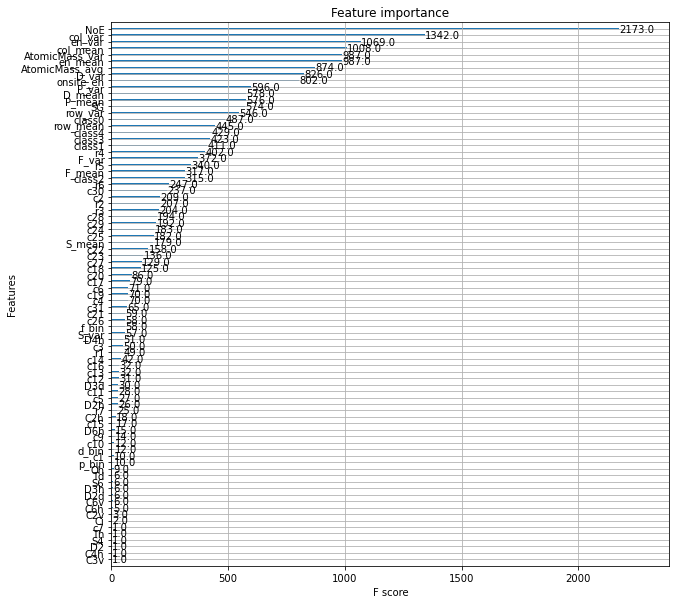

In [360]:
result_0 = train_test(train_X,train_y, test_X, test_y)

<AxesSubplot:>

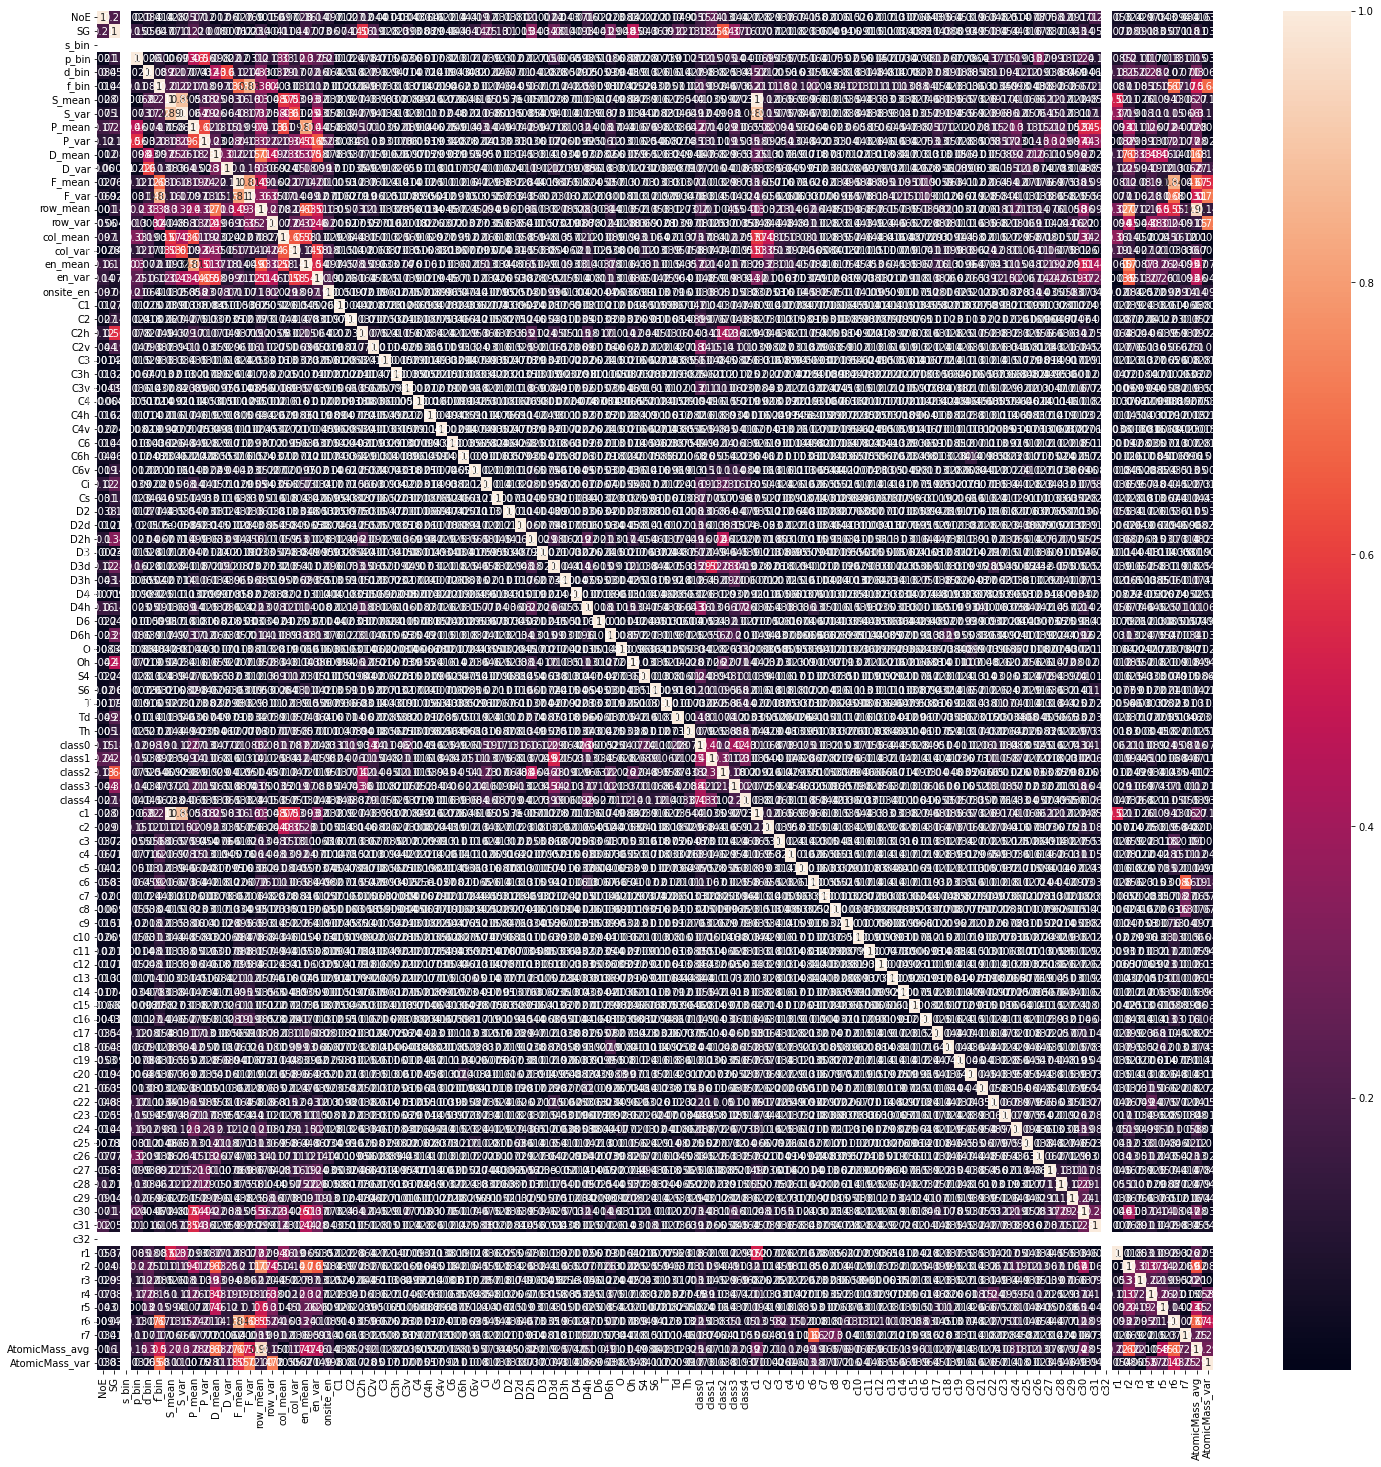

In [364]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(abs(train_X.corr()),annot = True)

## Paper's full model with selected features

In [365]:
train_X1 = train_X.drop(columns=['s_bin', 'p_bin', 'd_bin', 'f_bin','en_mean', 'en_var', 'onsite_en','C1',
       'C2', 'C2h', 'C2v', 'C3', 'C3h', 'C3v', 'C4', 'C4h', 'C4v', 'C6', 'C6h',
       'C6v', 'Ci', 'Cs', 'D2', 'D2d', 'D2h', 'D3', 'D3d', 'D3h', 'D4', 'D4h',
       'D6', 'D6h', 'O', 'Oh', 'S4', 'S6', 'T', 'Td', 'Th','AtomicMass_avg','AtomicMass_var'])
test_X1 = test_X.drop(columns=['s_bin', 'p_bin', 'd_bin', 'f_bin','en_mean', 'en_var', 'onsite_en','C1',
       'C2', 'C2h', 'C2v', 'C3', 'C3h', 'C3v', 'C4', 'C4h', 'C4v', 'C6', 'C6h',
       'C6v', 'Ci', 'Cs', 'D2', 'D2d', 'D2h', 'D3', 'D3d', 'D3h', 'D4', 'D4h',
       'D6', 'D6h', 'O', 'Oh', 'S4', 'S6', 'T', 'Td', 'Th','AtomicMass_avg','AtomicMass_var'])

Performing randomized search
[19:32:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:32:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if

[20:17:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results of randomized search ...
Best Parameters:


{'min_child_weight': 5,
 'max_depth': 30,
 'lambda': 0.3,
 'eta': 0.3,
 'colsample_bytree': 0.5,
 'colsample_bynode': 1}

Fitting the best parameters ...
[20:17:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision, Recall and F1 score for train data


(array([1.        , 0.98828125, 0.9971374 , 0.98374558, 0.99839829]),
 array([1.        , 0.98507463, 0.99334601, 0.99004267, 0.99839829]),
 array([1.        , 0.98667533, 0.9952381 , 0.98688408, 0.99839829]),
 array([4642, 1541, 1052, 1406, 1873]))

Precision, Recall and F1 score for test data


(array([0.91687871, 0.8030303 , 0.75174825, 0.8219697 , 0.86904762]),
 array([0.96863799, 0.76997579, 0.71428571, 0.68888889, 0.90495868]),
 array([0.94204793, 0.78615575, 0.73253833, 0.74956822, 0.88663968]),
 array([1116,  413,  301,  315,  484]))

Accuracy on train data


0.995529769830702

Accuracy on test data


0.8630658044883986

Plotting feature importances .. 


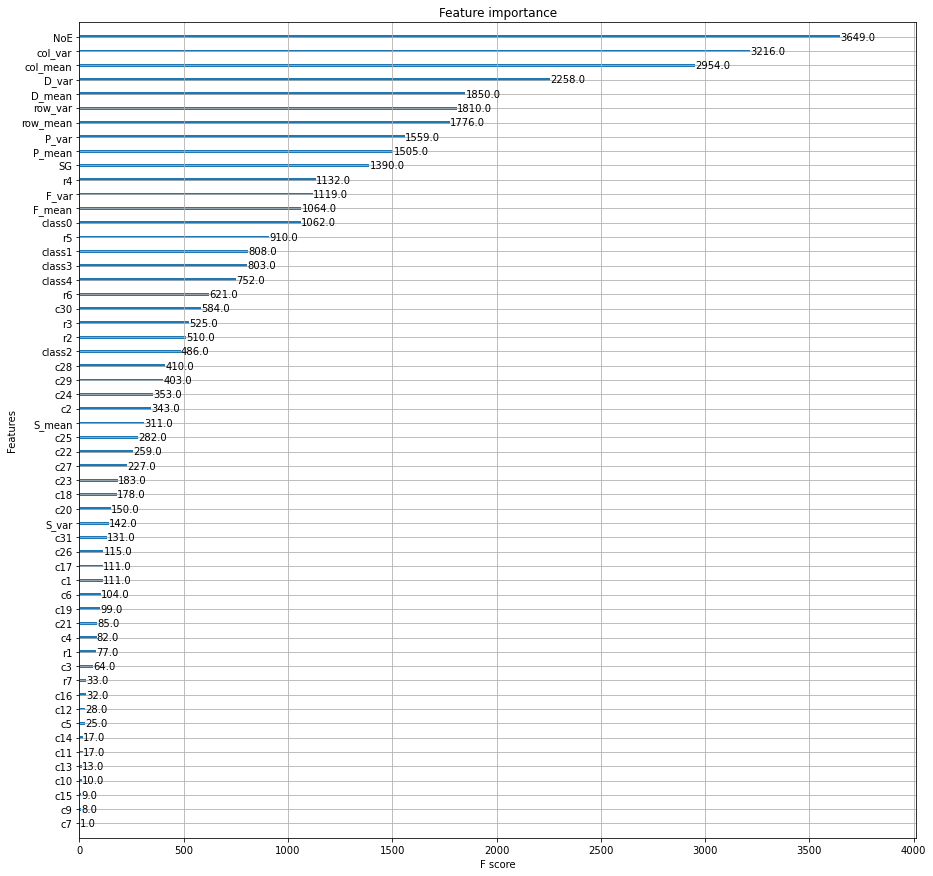

[19:36:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:41:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[20:13:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [366]:
result_1 = train_test(train_X1,train_y,test_X1,test_y)

## Paper with all features

In [367]:
train_X2 = train_X.drop(columns=['s_bin', 'p_bin', 'd_bin', 'f_bin','onsite_en'])
test_X2 = test_X.drop(columns=['s_bin', 'p_bin', 'd_bin', 'f_bin','onsite_en'])

Performing randomized search
[21:23:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results of randomized search ...
Best Parameters:


{'min_child_weight': 6,
 'max_depth': 10,
 'lambda': 0.03,
 'eta': 0.3,
 'colsample_bytree': 0.6,
 'colsample_bynode': 0.7}

Fitting the best parameters ...
[21:23:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision, Recall and F1 score for train data


(array([1.        , 0.98828125, 0.9971374 , 0.98443029, 0.99786667]),
 array([1.        , 0.98507463, 0.99334601, 0.98933144, 0.99893219]),
 array([1.        , 0.98667533, 0.9952381 , 0.98687478, 0.99839915]),
 array([4642, 1541, 1052, 1406, 1873]))

Precision, Recall and F1 score for test data


(array([0.91901108, 0.80456853, 0.75090253, 0.76923077, 0.86372745]),
 array([0.96594982, 0.76755448, 0.6910299 , 0.6984127 , 0.89049587]),
 array([0.94189602, 0.78562577, 0.71972318, 0.73211314, 0.87690743]),
 array([1116,  413,  301,  315,  484]))

Accuracy on train data


0.995529769830702

Accuracy on test data


0.8573602130087485

Plotting feature importances .. 


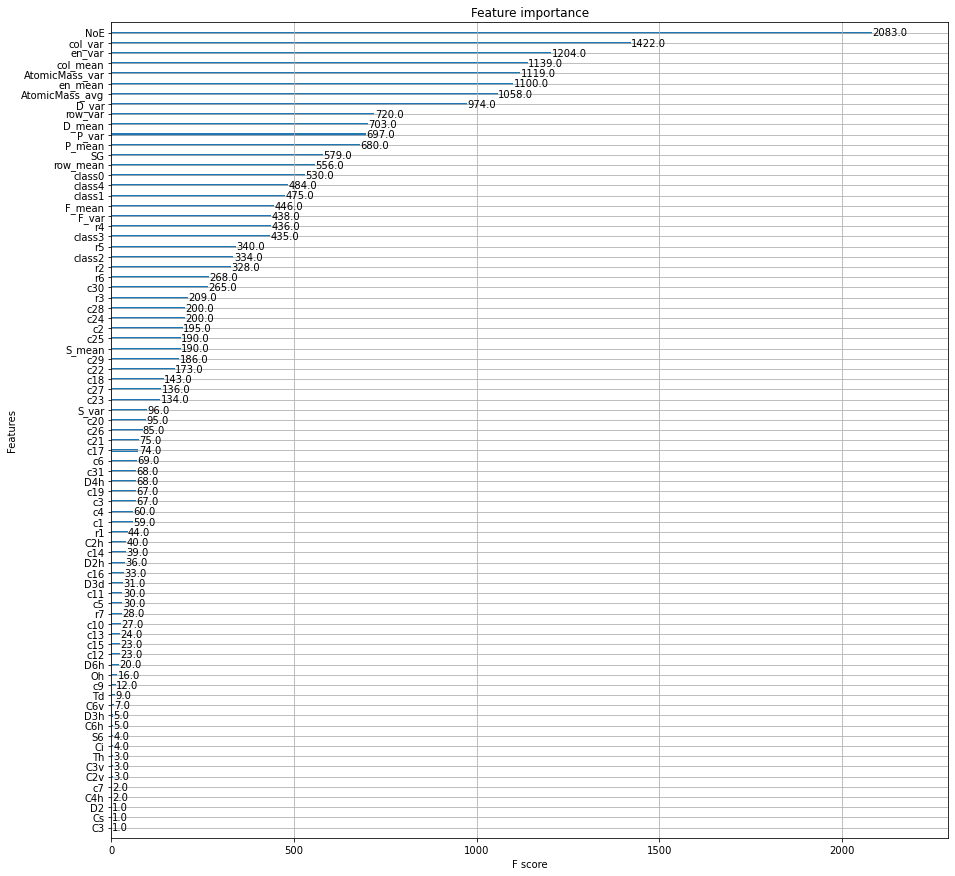

[19:32:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[20:22:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:24:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:29:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[20:22:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:24:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:29:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[19:32:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[20:22:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:24:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:29:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [368]:
res2 = train_test(train_X2,train_y,test_X2,test_y)

[00:24:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

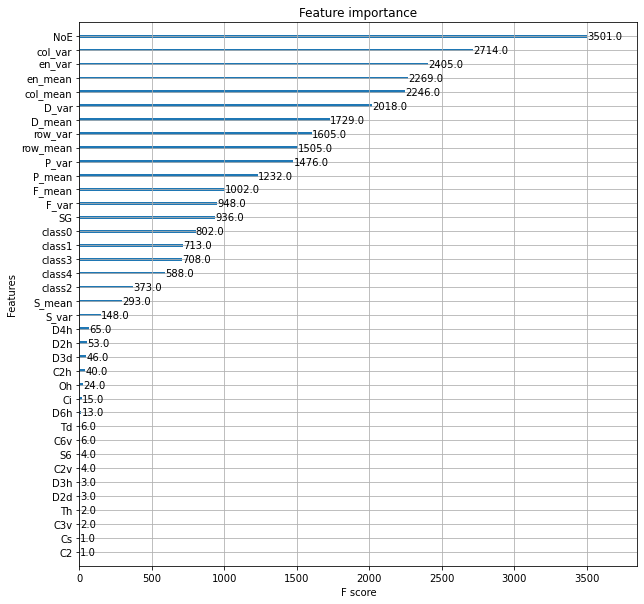

In [273]:
best_params_ = {'min_child_weight': 8,
 'max_depth': 200,
 'lambda': 1,
 'eta': 0.3,
 'colsample_bytree': 0.6,
 'colsample_bynode': 1}
clf = XGBClassifier(**best_params_)
clf.fit(train_X2,train_y)
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(clf, ax=ax)

## Our feature (onsite energy) + paper's final features

Performing randomized search
[22:42:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results of randomized search ...
Best Parameters:


{'min_child_weight': 6,
 'max_depth': 100,
 'lambda': 1,
 'eta': 0.3,
 'colsample_bytree': 1,
 'colsample_bynode': 0.9}

Fitting the best parameters ...
[22:42:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision, Recall and F1 score for train data


(array([1.        , 0.98828125, 0.99808795, 0.98306281, 0.99839829]),
 array([1.        , 0.98507463, 0.99239544, 0.99075391, 0.99839829]),
 array([1.        , 0.98667533, 0.99523356, 0.98689338, 0.99839829]),
 array([4642, 1541, 1052, 1406, 1873]))

Precision, Recall and F1 score for test data


(array([0.91945159, 0.79639175, 0.72240803, 0.75925926, 0.85940594]),
 array([0.96146953, 0.74818402, 0.71760797, 0.65079365, 0.89669421]),
 array([0.93999124, 0.77153558, 0.72      , 0.7008547 , 0.8776542 ]),
 array([1116,  413,  301,  315,  484]))

Accuracy on train data


0.995529769830702

Accuracy on test data


0.8508938759984785

Plotting feature importances .. 


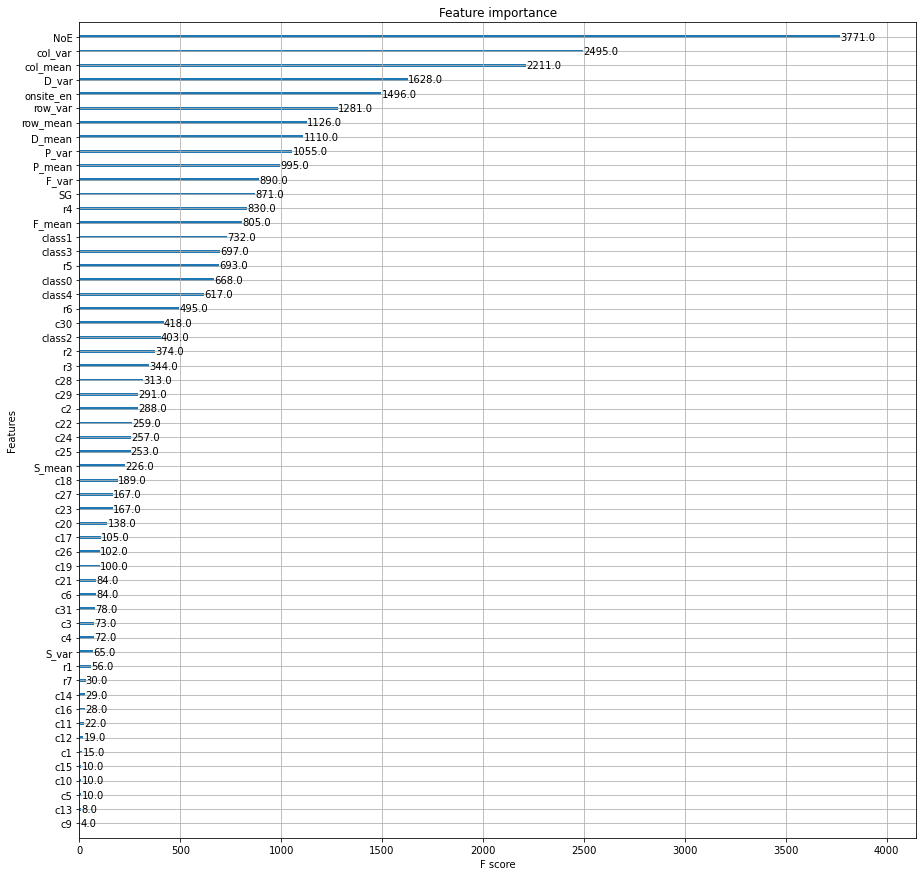

[22:01:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[22:01:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[22:01:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[22:01:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[22:01:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [369]:
train_X3 = train_X.drop(columns=['s_bin', 'p_bin', 'd_bin', 'f_bin','en_mean', 'en_var','C1',
       'C2', 'C2h', 'C2v', 'C3', 'C3h', 'C3v', 'C4', 'C4h', 'C4v', 'C6', 'C6h',
       'C6v', 'Ci', 'Cs', 'D2', 'D2d', 'D2h', 'D3', 'D3d', 'D3h', 'D4', 'D4h',
       'D6', 'D6h', 'O', 'Oh', 'S4', 'S6', 'T', 'Td', 'Th','AtomicMass_avg','AtomicMass_var'])
test_X3 = test_X.drop(columns=['s_bin', 'p_bin', 'd_bin', 'f_bin','en_mean', 'en_var','C1',
       'C2', 'C2h', 'C2v', 'C3', 'C3h', 'C3v', 'C4', 'C4h', 'C4v', 'C6', 'C6h',
       'C6v', 'Ci', 'Cs', 'D2', 'D2d', 'D2h', 'D3', 'D3d', 'D3h', 'D4', 'D4h',
       'D6', 'D6h', 'O', 'Oh', 'S4', 'S6', 'T', 'Td', 'Th','AtomicMass_avg','AtomicMass_var'])

res3 = train_test(train_X3,train_y,test_X3,test_y)

## Removing (s, p) features from final model

Performing randomized search
[23:57:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results of randomized search ...
Best Parameters:


{'min_child_weight': 5,
 'max_depth': 10,
 'lambda': 0.01,
 'eta': 0.3,
 'colsample_bytree': 0.6,
 'colsample_bynode': 0.7}

Fitting the best parameters ...
[23:57:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision, Recall and F1 score for train data


(array([1.        , 0.9857513 , 0.99808795, 0.98649609, 0.99786667]),
 array([1.        , 0.98767034, 0.99239544, 0.98719772, 0.99893219]),
 array([1.        , 0.98670989, 0.99523356, 0.98684678, 0.99839915]),
 array([4642, 1541, 1052, 1406, 1873]))

Precision, Recall and F1 score for test data


(array([0.92175408, 0.79292929, 0.73883162, 0.77737226, 0.85742574]),
 array([0.96057348, 0.76029056, 0.71428571, 0.67619048, 0.8946281 ]),
 array([0.94076349, 0.776267  , 0.72635135, 0.72325976, 0.87563195]),
 array([1116,  413,  301,  315,  484]))

Accuracy on train data


0.995529769830702

Accuracy on test data


0.8546976036515785

Plotting feature importances .. 


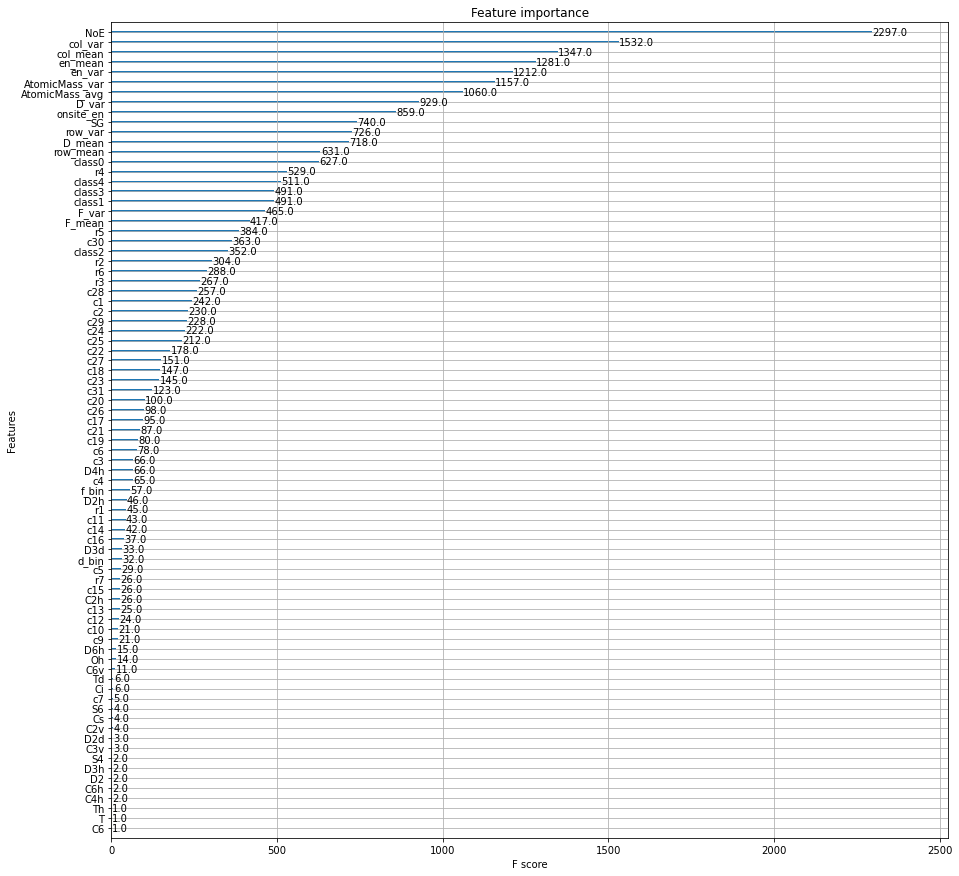

In [372]:
train_X4 = train_X.drop(columns=['s_bin', 'p_bin','S_mean',
 'S_var',
 'P_mean',
 'P_var'])
test_X4 = test_X.drop(columns=['s_bin', 'p_bin','S_mean',
 'S_var',
 'P_mean',
 'P_var'])

res4 = train_test(train_X4,train_y,test_X4,test_y)

## Removing (d,f) features from final model

Performing randomized search
[08:09:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:11:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:09:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:11:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if

[08:09:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:11:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:13:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:14:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[08:25:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:25:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[08:35:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[08:48:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:10:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

{'min_child_weight': 6,
 'max_depth': 10,
 'lambda': 1,
 'eta': 0.3,
 'colsample_bytree': 0.5,
 'colsample_bynode': 1}

Fitting the best parameters ...
[09:10:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision, Recall and F1 score for train data


(array([1.        , 0.98828125, 0.99619048, 0.98511694, 0.99786667]),
 array([1.        , 0.98507463, 0.99429658, 0.9886202 , 0.99893219]),
 array([1.        , 0.98667533, 0.99524263, 0.98686546, 0.99839915]),
 array([4642, 1541, 1052, 1406, 1873]))

Precision, Recall and F1 score for test data


(array([0.92222222, 0.79093199, 0.76156584, 0.79477612, 0.87134503]),
 array([0.96684588, 0.76029056, 0.71096346, 0.67619048, 0.92355372]),
 array([0.944007  , 0.77530864, 0.73539519, 0.73070326, 0.89669007]),
 array([1116,  413,  301,  315,  484]))

Accuracy on train data


0.995529769830702

Accuracy on test data


0.8623050589577786

Plotting feature importances .. 


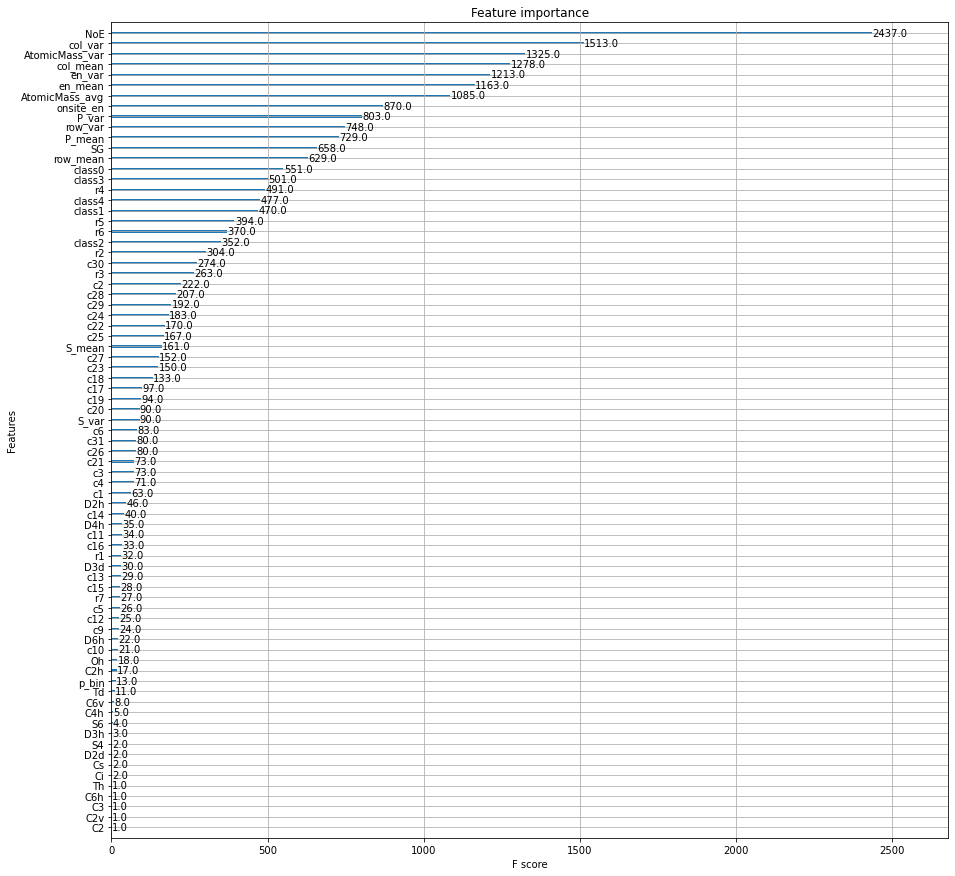

In [374]:
train_X5 = train_X.drop(columns=['d_bin', 'f_bin','D_mean',
 'D_var',
 'F_mean',
 'F_var'])
test_X5 = test_X.drop(columns=['d_bin', 'f_bin','D_mean',
 'D_var',
 'F_mean',
 'F_var'])

res5 = train_test(train_X5,train_y,test_X5,test_y)

## Importance of binary indicators of s,p,d,f electrons

Performing randomized search
[08:56:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if

{'min_child_weight': 6,
 'max_depth': 100,
 'lambda': 1,
 'eta': 0.3,
 'colsample_bytree': 0.9,
 'colsample_bynode': 0.9}

Fitting the best parameters ...
[10:09:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision, Recall and F1 score for train data


(array([1.        , 0.98200514, 0.99619048, 0.99209202, 0.99786667]),
 array([1.        , 0.99156392, 0.99429658, 0.98150782, 0.99893219]),
 array([1.        , 0.98676138, 0.99524263, 0.98677154, 0.99839915]),
 array([4642, 1541, 1052, 1406, 1873]))

Precision, Recall and F1 score for test data


(array([0.92208904, 0.77970297, 0.72542373, 0.80392157, 0.85404339]),
 array([0.96505376, 0.76271186, 0.71096346, 0.65079365, 0.8946281 ]),
 array([0.94308231, 0.77111383, 0.71812081, 0.71929825, 0.87386478]),
 array([1116,  413,  301,  315,  484]))

Accuracy on train data


0.995529769830702

Accuracy on test data


0.8535564853556485

Plotting feature importances .. 


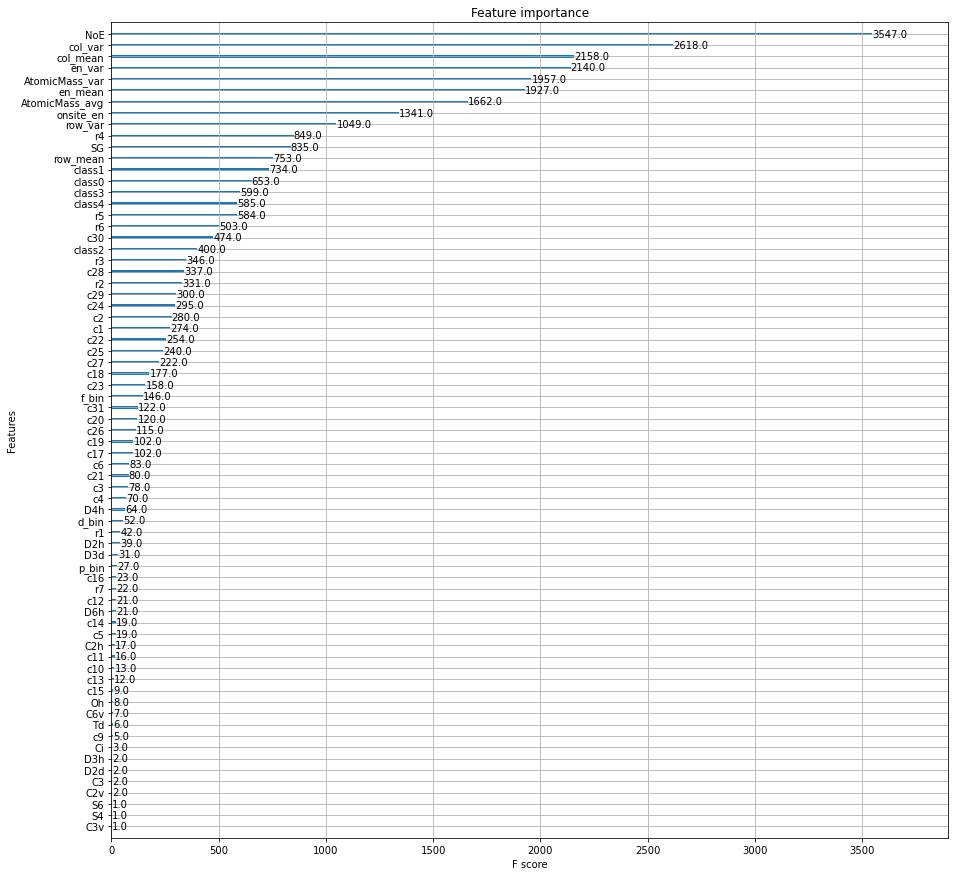

[09:56:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:57:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:00:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[08:38:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[08:41:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[08:40:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[08:41:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[08:40:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [375]:
train_X6 = train_X.drop(columns=['S_mean',
 'S_var',
 'P_mean',
 'P_var',
 'D_mean',
 'D_var',
 'F_mean',
 'F_var',])
test_X6 = test_X.drop(columns=['S_mean',
 'S_var',
 'P_mean',
 'P_var',
 'D_mean',
 'D_var',
 'F_mean',
 'F_var',])

res6 = train_test(train_X6,train_y,test_X6,test_y)

## SVM gaussian kernels

In [22]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC

In [27]:
from sklearn.model_selection import StratifiedKFold

In [8]:
train = pd.read_csv('/Users/chaithanya/Documents/DDP/DDP-dump/Data/train_small.csv')

In [12]:
param_grid = {'C':[1,10,100,1e3,1e4,1e5,1e6,1e7],'gamma':['scale','auto']}
model = SVC()
gs = GridSearchCV(model,param_grid = param_grid, n_jobs = -1)
results = gs.fit(train.drop(columns=['Top_Class']),train['Top_Class'])

In [10]:
pd.DataFrame(results.cv_results_).sort_values(by = 'rank_test_score') # RandomizedSearchCV

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
13      23.066761      1.281109         7.725225        0.266575        auto   
19      22.761371      1.364378         5.589732        0.711295        auto   
17      25.186775      0.955119         7.853125        0.353187        auto   
15      21.390972      0.795313         7.820774        0.411016        auto   
11      22.342283      0.568083         8.534817        0.353856        auto   
9       22.389820      0.575335         7.837540        0.216921        auto   
7       20.999220      0.626661         8.706132        0.450312        auto   
5       26.113201      1.037564         8.599784        0.192987        auto   
6       15.139070      1.355068         7.096344        0.178202       scale   
8       16.140451      1.838703         7.943918        0.522792       scale   
18      16.740356      1.620174         7.914072        0.983298       scale   
10      15.157331      0.746143         7.569373        0.177959       scale   
4       18.631974      1.460828         8.055810        0.742403       scale   
12      17.502241      1.006405         8.045659        0.662961       scale   
14      15.103580      0.397187         7.206645        0.071402       scale   
16      15.408400      0.992718         8.480823        0.318464       scale   
3       31.042253      2.867679        11.037117        0.770224        auto   
2       27.943476      1.189430         9.264404        0.276810       scale   
1       28.385563      4.120594        10.339878        0.559656        auto   
0       22.079356      0.357439         7.318104        0.166726       scale   

      param_C                              params  split0_test_score  \
13     1000.0      {'gamma': 'auto', 'C': 1000.0}           0.733238   
19  1000000.0   {'gamma': 'auto', 'C': 1000000.0}           0.734189   
17   100000.0    {'gamma': 'auto', 'C': 100000.0}           0.734189   
15    10000.0     {'gamma': 'auto', 'C': 10000.0}           0.734189   
11        100         {'gamma': 'auto', 'C': 100}           0.726581   
9          10          {'gamma': 'auto', 'C': 10}           0.713267   
7           1           {'gamma': 'auto', 'C': 1}           0.666191   
5         0.1         {'gamma': 'auto', 'C': 0.1}           0.541132   
6           1          {'gamma': 'scale', 'C': 1}           0.440799   
8          10         {'gamma': 'scale', 'C': 10}           0.440799   
18  1000000.0  {'gamma': 'scale', 'C': 1000000.0}           0.440799   
10        100        {'gamma': 'scale', 'C': 100}           0.440799   
4         0.1        {'gamma': 'scale', 'C': 0.1}           0.440799   
12     1000.0     {'gamma': 'scale', 'C': 1000.0}           0.440799   
14    10000.0    {'gamma': 'scale', 'C': 10000.0}           0.440799   
16   100000.0   {'gamma': 'scale', 'C': 100000.0}           0.440799   
3        0.01        {'gamma': 'auto', 'C': 0.01}           0.438421   
2        0.01       {'gamma': 'scale', 'C': 0.01}           0.438421   
1       0.001       {'gamma': 'auto', 'C': 0.001}           0.438421   
0       0.001      {'gamma': 'scale', 'C': 0.001}           0.438421   

    split1_test_score  split2_test_score  split3_test_score  \
13           0.727057           0.742273           0.732763   
19           0.727057           0.741797           0.733714   
17           0.727057           0.741797           0.733714   
15           0.727057           0.741797           0.733714   
11           0.727057           0.734189           0.727057   
9            0.713267           0.724679           0.718497   
7            0.668569           0.689967           0.663338   
5            0.551593           0.554922           0.547789   
6            0.440799           0.437946           0.439848   
8            0.440799           0.437946           0.439848   
18           0.440799           0.437946           0.439848   
10           0.440799           0.437946           0.4

In [13]:
pd.DataFrame(results.cv_results_).sort_values(by = 'rank_test_score') # GridSearchCV

mean_fit_time  std_fit_time  mean_score_time  std_score_time     param_C  \
7       21.708584      0.788334         7.775967        0.292514      1000.0   
9       21.597506      0.561065         7.902829        0.296703     10000.0   
11      22.380466      0.655688         7.911290        0.121161    100000.0   
13      22.488407      0.548430         8.090600        0.426008   1000000.0   
15      23.023925      1.447988         4.979836        0.564537  10000000.0   
5       22.203615      0.633055         7.521126        0.175530         100   
3       21.106400      0.494944         7.844952        0.139125          10   
1       22.938681      0.842117         9.164090        0.310363           1   
0       17.993318      0.504723         7.453162        0.144657           1   
2       16.810629      0.827945         7.627950        0.214566          10   
4       15.801789      0.325189         7.068770        0.293724         100   
6       15.152074      0.679456         6.917765        0.232998      1000.0   
8       14.795603      0.802837         7.310408        0.207055     10000.0   
10      15.282347      0.501451         7.521155        0.208035    100000.0   
12      15.696949      0.709076         7.550551        0.188135   1000000.0   
14      16.997852      1.809056         7.649980        0.594199  10000000.0   

   param_gamma                               params  split0_test_score  \
7         auto       {'C': 1000.0, 'gamma': 'auto'}           0.733238   
9         auto      {'C': 10000.0, 'gamma': 'auto'}           0.734189   
11        auto     {'C': 100000.0, 'gamma': 'auto'}           0.734189   
13        auto    {'C': 1000000.0, 'gamma': 'auto'}           0.734189   
15        auto   {'C': 10000000.0, 'gamma': 'auto'}           0.733714   
5         auto          {'C': 100, 'gamma': 'auto'}           0.726581   
3         auto           {'C': 10, 'gamma': 'auto'}           0.713267   
1         auto            {'C': 1, 'gamma': 'auto'}           0.666191   
0        scale           {'C': 1, 'gamma': 'scale'}           0.440799   
2        scale          {'C': 10, 'gamma': 'scale'}           0.440799   
4        scale         {'C': 100, 'gamma': 'scale'}           0.440799   
6        scale      {'C': 1000.0, 'gamma': 'scale'}           0.440799   
8        scale     {'C': 10000.0, 'gamma': 'scale'}           0.440799   
10       scale    {'C': 100000.0, 'gamma': 'scale'}           0.440799   
12       scale   {'C': 1000000.0, 'gamma': 'scale'}           0.440799   
14       scale  {'C': 10000000.0, 'gamma': 'scale'}           0.440799   

    split1_test_score  split2_test_score  split3_test_score  \
7            0.727057           0.742273           0.732763   
9            0.727057           0.741797           0.733714   
11           0.727057           0.741797           0.733714   
13           0.727057           0.741797           0.733714   
15           0.727057           0.741797           0.733714   
5            0.727057           0.734189           0.727057   
3            0.713267           0.724679           0.718497   
1            0.668569           0.689967           0.663338   
0            0.440799           0.437946           0.439848   
2            0.440799           0.437946           0.439848   
4            0.440799           0.437946           0.439848   
6            0.440799           0.437946           0.439848   
8            0.440799           0.437946           0.439848   
10           0.440799           0.437946           0.439848   
12           0.440799           0.437946           0.439848   
14           0.440799           0.437946           0.439848   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
7            0.746908         0.736448        0.007147                1  
9            0.745005         0.736352        0.006365                2  
11           0.745005         0.736352        0.006365                2  
13           0.7

In [122]:
svm_params = {'C': 1000.0, 'gamma': 'auto'}

In [28]:
X = train.drop(columns=['Top_Class'])
y = train['Top_Class']

In [30]:
# param_grid = {'nu':[1,0.8,.6,.4,.2,.01],'gamma':['scale','auto']}
# model = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)
skf = StratifiedKFold(n_splits=3)
#StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = NuSVC(degree = 1, kernel = "rbf")
    model.fit(X_train,y_train)
    print("The score on CV is: ", model.score(X_test,y_test))

TRAIN: [ 3367  3368  3378 ... 10511 10512 10513] TEST: [   0    1    2 ... 3604 3608 3615]


ValueError: specified nu is infeasible

In [15]:
import seaborn as sns

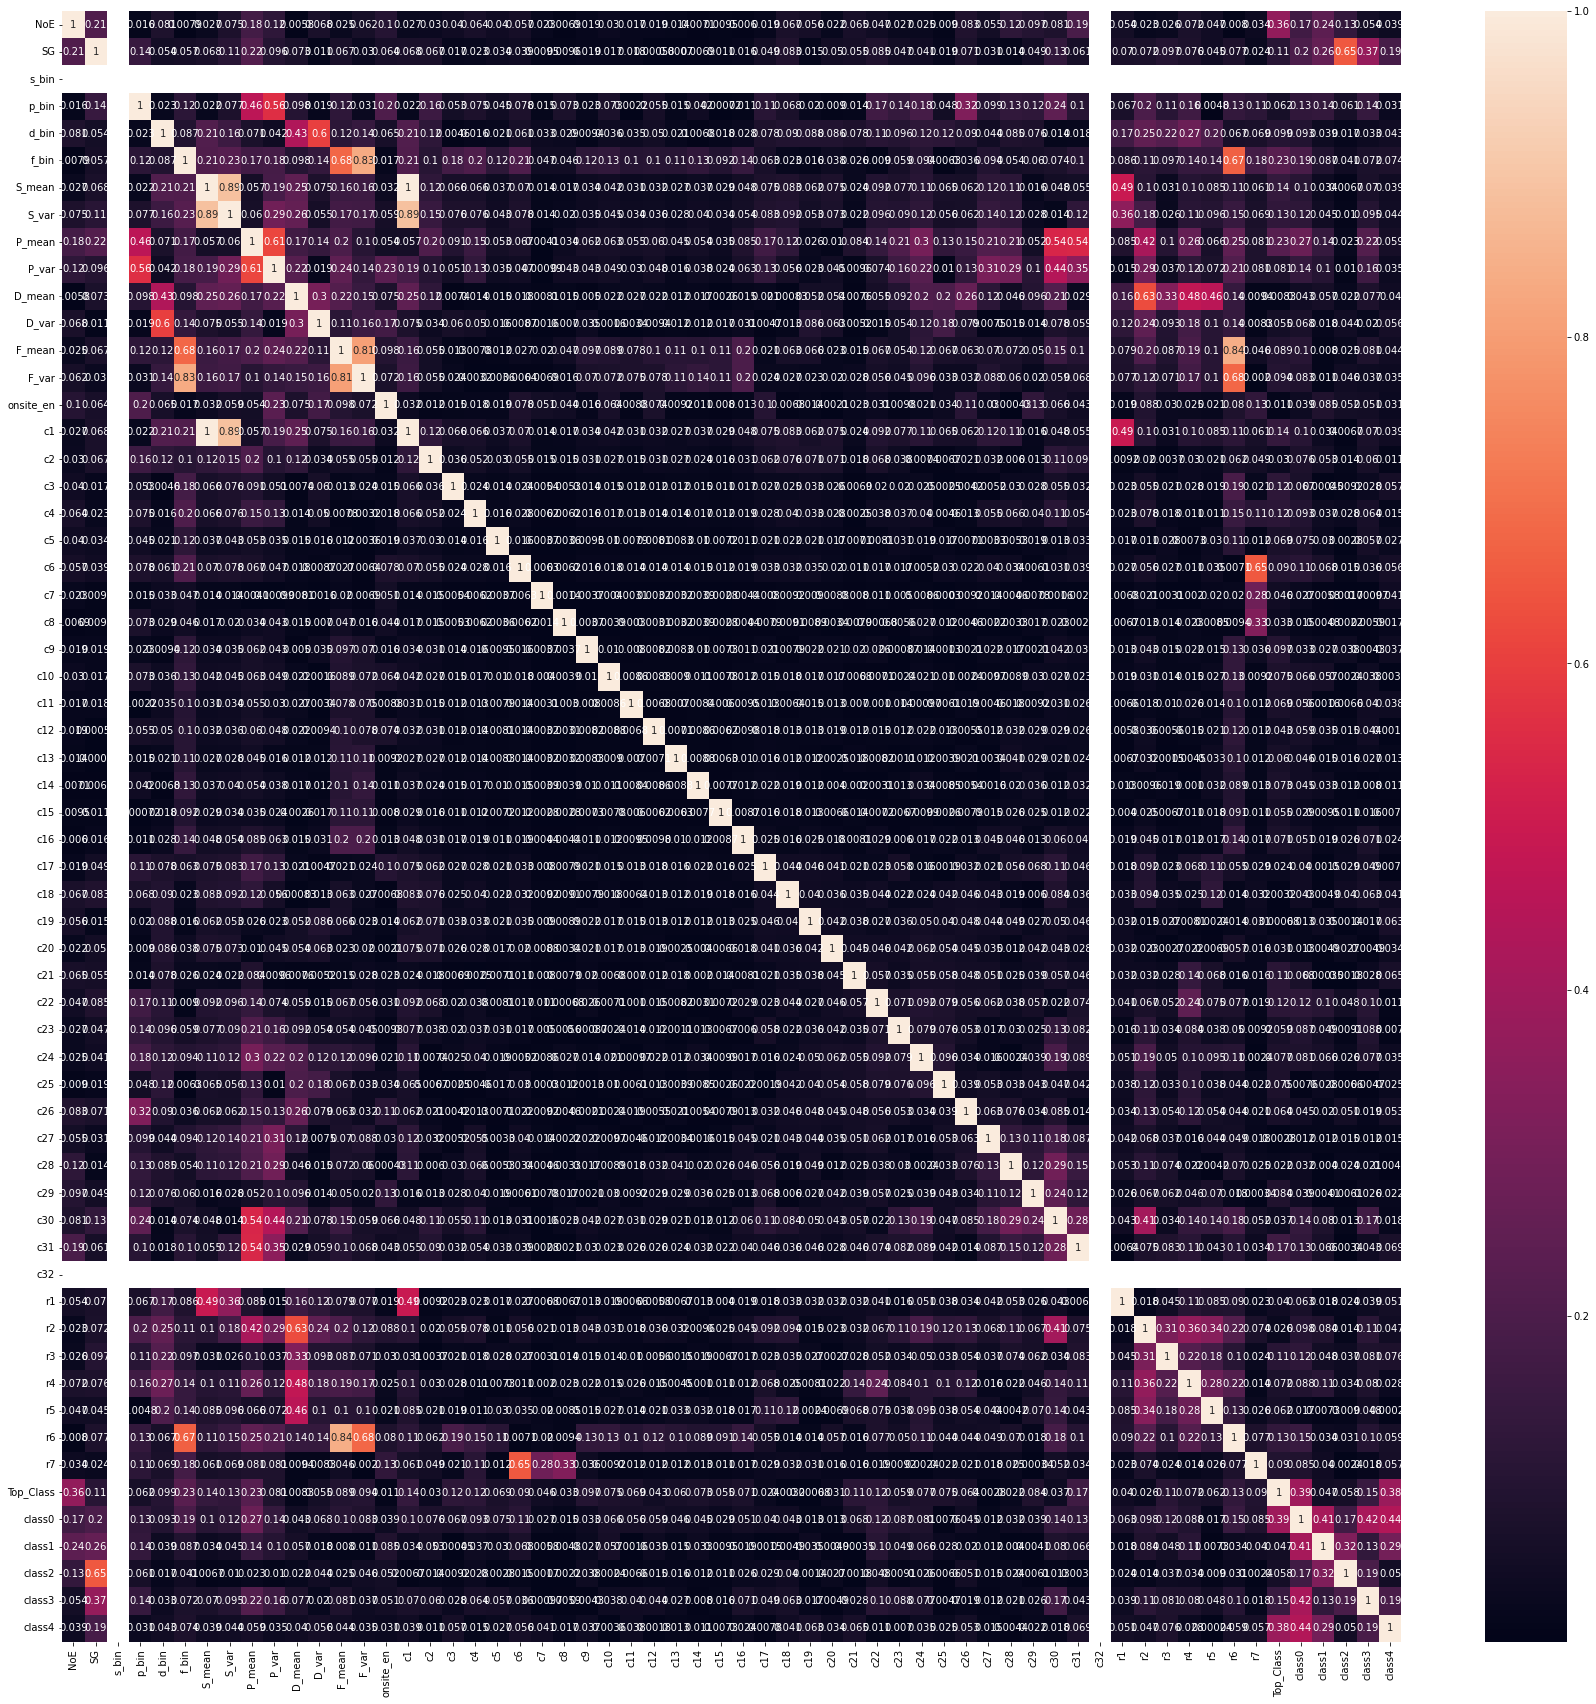

In [17]:
plt.figure(figsize=(30,30))
sns.heatmap(abs(train.corr()),annot = True)
plt.show()

In [18]:
train.drop(columns = ['s_bin','F_var','c32','c1','r6'],inplace=True)

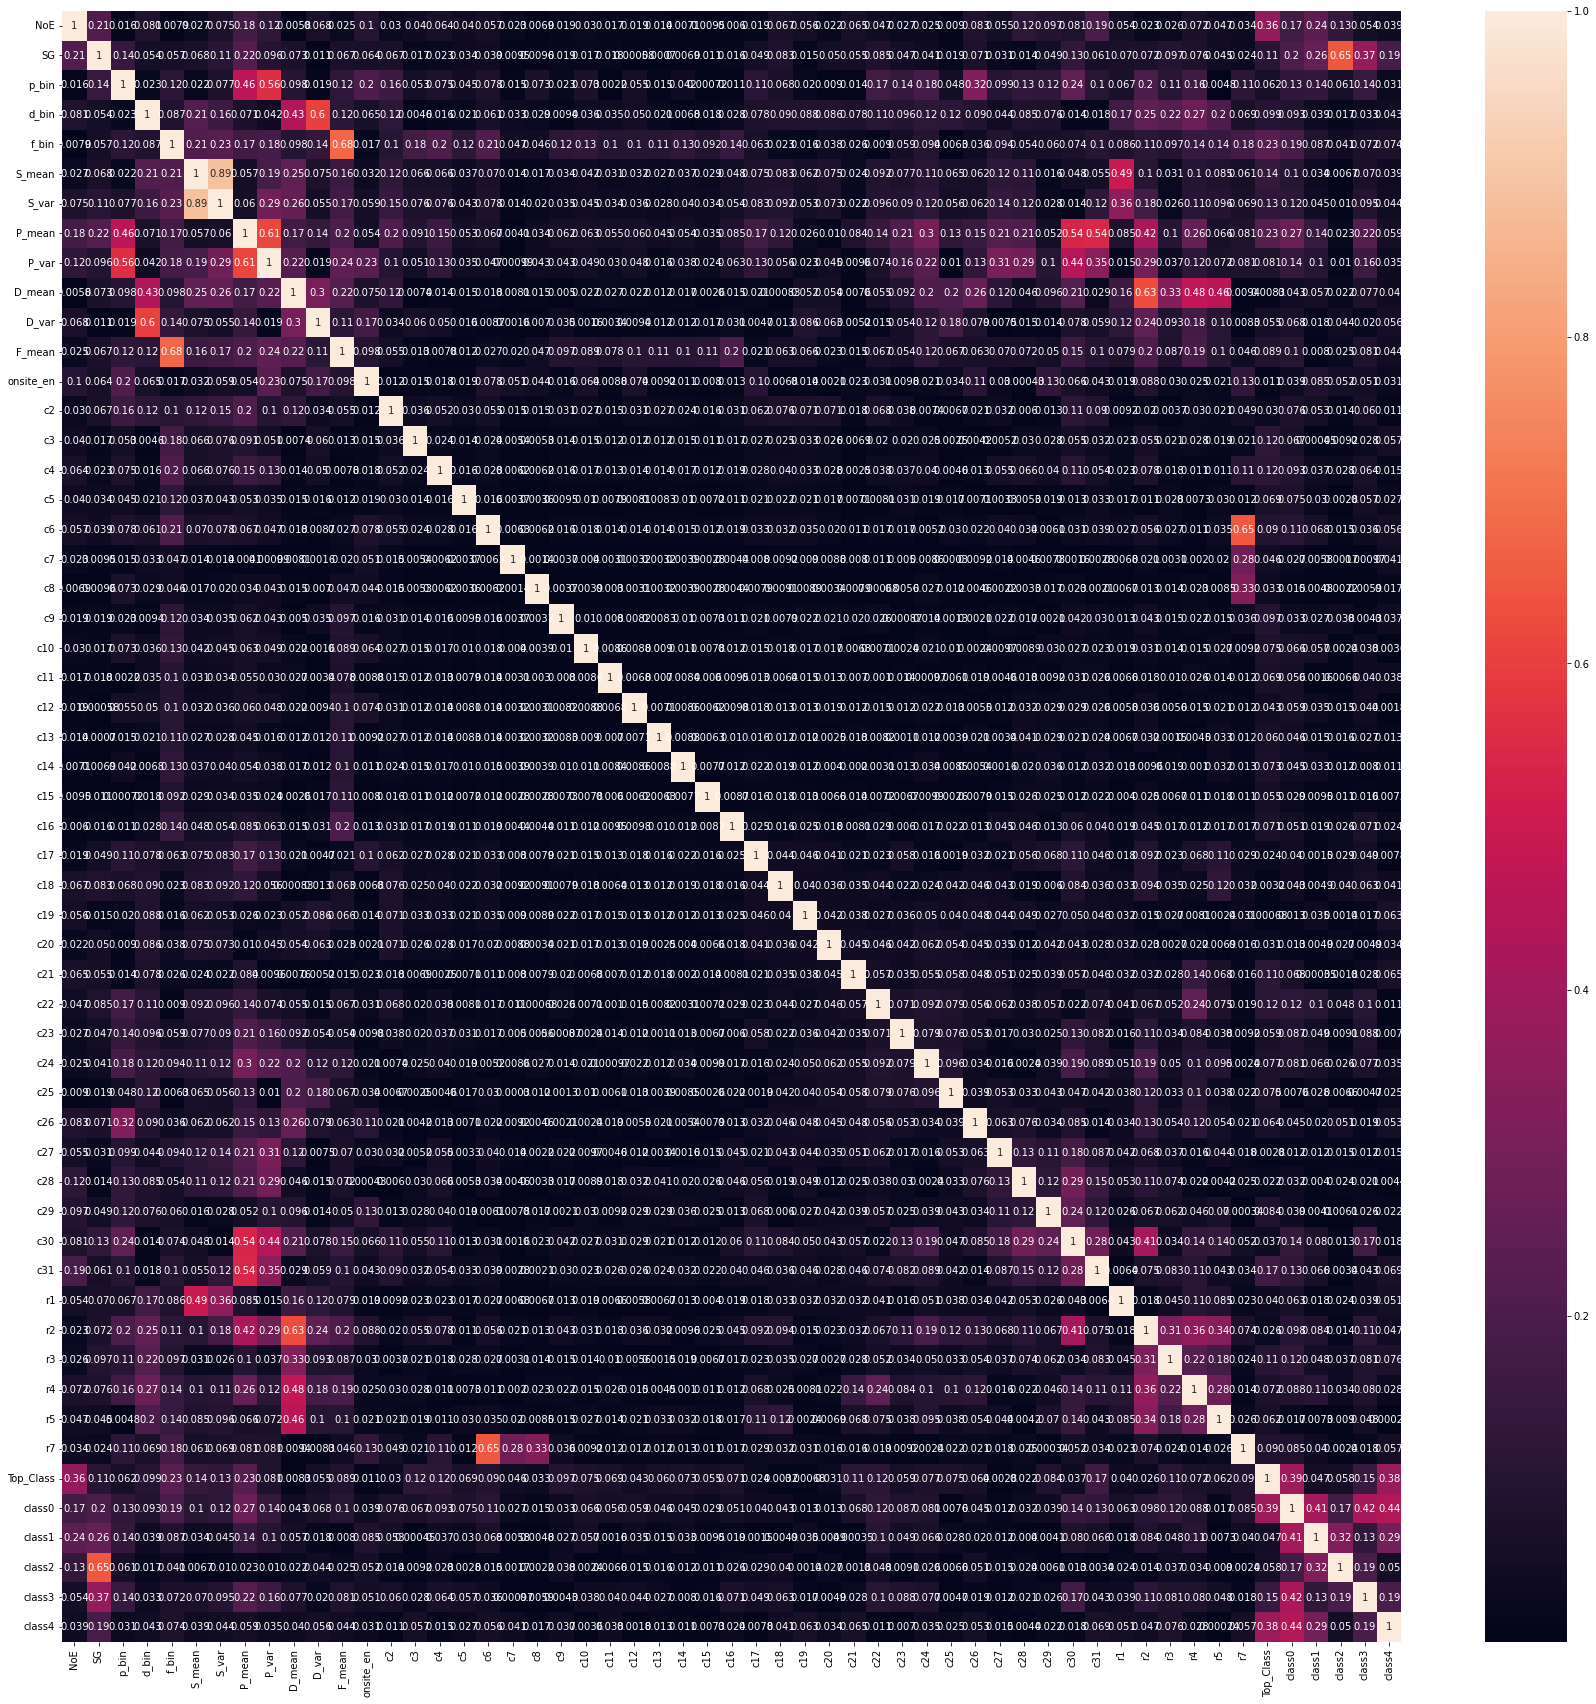

In [19]:
plt.figure(figsize=(30,30))
sns.heatmap(abs(train.corr()),annot = True)
plt.show()

In [20]:
train.drop(columns = ['S_var'],inplace=True)

In [45]:
test.to_csv('/Users/chaithanya/Documents/DDP/DDP-dump/Data/test_small.csv',index=False)

## Stacking

In [31]:
from mlxtend.classifier import StackingCVClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
warnings.simplefilter('ignore')

In [77]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
lr = LogisticRegression()

In [ ]:
# Try SVM, GBT, MLP

In [41]:
test = pd.read_csv('/Users/chaithanya/Documents/DDP/DDP-dump/Data/test_small.csv')
test.drop(columns = ['s_bin','F_var','c32','c1','r6','S_var'],inplace=True)

In [53]:
from sklearn.model_selection import train_test_split

In [48]:
TRAIN = train.copy()

In [66]:
train, cv = train_test_split(TRAIN, stratify=TRAIN['Top_Class'], test_size=0.2)

In [69]:
X_test = cv.drop(columns=['Top_Class'])
y_test = cv['Top_Class']

In [70]:
X_train = train.drop(columns=['Top_Class'])
y_train = train['Top_Class']

In [72]:
len(y_train)

8411

In [80]:
sclf = StackingCVClassifier(classifiers = [clf1, clf2, clf3],
                            shuffle = False,
                            cv = 3,
                            meta_classifier = lr)

classifiers = {"KNN": clf1,
               "RF": clf2,
               "NB": clf3,
               
               "Stack": sclf}

for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
    
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

In [83]:
results

KNN  RF  NB  Stack  Target
0       0   0   0      0     0.0
1       1   1   0      0     NaN
2       0   0   0      0     0.0
3       0   1   1      1     4.0
4       0   0   0      0     NaN
...   ...  ..  ..    ...     ...
2098    2   2   0      1     NaN
2099    0   0   0      0     NaN
2100    0   0   0      0     NaN
2101    1   1   0      0     NaN
2102    4   4   0      4     NaN

[2103 rows x 5 columns]

In [91]:
results['Target'] = list(y_test)

In [97]:
print("Score for KNN: ", metrics.f1_score(results['Target'],results['KNN'],average='micro'))
print("Score for RF: ", metrics.f1_score(results['Target'],results['RF'],average='micro'))
print("Score for NB: ", metrics.f1_score(results['Target'],results['NB'],average='micro'))
print("Score for Stacked: ", metrics.f1_score(results['Target'],results['Stack'],average='micro'))

Score for KNN:  0.7408464098906323
Score for RF:  0.8197812648597242
Score for NB:  0.43937232524964337
Score for Stacked:  0.5972420351878269


## Training each classifier

In [98]:
from sklearn.model_selection import cross_val_score

In [ ]:
## knn, svm, NB, MLP, GBT, RF, 

In [101]:
## knn
model = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,3,5,7,10,15,20],'weights':['uniform','distance']}
RS = RandomizedSearchCV(model,param_distributions=param_grid, cv=StratifiedKFold(3),n_jobs=-1,n_iter=30)
RS.fit(TRAIN.drop(columns = ['Top_Class']), TRAIN['Top_Class'])
display(pd.DataFrame(RS.cv_results_).sort_values(by = 'rank_test_score').head())
RS.best_params_

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5        0.021291      0.001632         1.954795        0.161319   
7        0.020899      0.003291         1.808376        0.087930   
9        0.020591      0.005172         1.797623        0.056928   
3        0.014867      0.002000         1.861504        0.056606   
11       0.012326      0.001055         1.834502        0.111257   
13       0.013919      0.001030         1.454331        0.217734   
0        0.060642      0.000648         3.212934        0.013517   
1        0.122554      0.062757         2.906894        0.150228   
2        0.139274      0.105990         2.743351        0.512150   
4        0.019770      0.003821         2.356985        0.115547   
6        0.019765      0.002623         2.045759        0.026337   
8        0.013678      0.000068         1.961966        0.124869   
10       0.014753      0.001434         2.124968        0.060439   
12       0.012188      0.000687         2.104979        0.217783   

   param_weights param_n_neighbors  \
5       distance                 5   
7       distance                 7   
9       distance                10   
3       distance                 3   
11      distance                15   
13      distance                20   
0        uniform                 1   
1       distance                 1   
2        uniform                 3   
4        uniform                 5   
6        uniform                 7   
8        uniform                10   
10       uniform                15   
12       uniform                20   

                                        params  split0_test_score  \
5    {'weights': 'distance', 'n_neighbors': 5}           0.709843   
7    {'weights': 'distance', 'n_neighbors': 7}           0.702710   
9   {'weights': 'distance', 'n_neighbors': 10}           0.712696   
3    {'weights': 'distance', 'n_neighbors': 3}           0.708417   
11  {'weights': 'distance', 'n_neighbors': 15}           0.708131   
13  {'weights': 'distance', 'n_neighbors': 20}           0.706419   
0     {'weights': 'uniform', 'n_neighbors': 1}           0.708131   
1    {'weights': 'distance', 'n_neighbors': 1}           0.708131   
2     {'weights': 'uniform', 'n_neighbors': 3}           0.664194   
4     {'weights': 'uniform', 'n_neighbors': 5}           0.634237   
6     {'weights': 'uniform', 'n_neighbors': 7}           0.613409   
8    {'weights': 'uniform', 'n_neighbors': 10}           0.604280   
10   {'weights': 'uniform', 'n_neighbors': 15}           0.592297   
12   {'weights': 'uniform', 'n_neighbors': 20}           0.581170   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
5            0.719829           0.737443         0.722372        0.011410   
7            0.720114           0.742580         0.721801        0.016320   
9            0.715835           0.734874         0.721135        0.009799   
3            0.716976           0.732877         0.719423        0.010135   
11           0.715264           0.723174         0.715523        0.006144   
13           0.708702           0.727740         0.714287        0.009558   
0            0.708131           0.724886         0.713716        0.007898   
1            0.708131           0.724886         0.713716        0.007898   
2            0.663338           0.680080         0.669204        0.007698   
4            0.643652           0.655537         0.644475        0.008715   
6            0.630528           0.640696         0.628211        0.011260   
8            0.617689           0.618436         0.613468        0.006504   
10           0.598573           0.595320         0.595397        0.002563   
12           0.587447           0.590753         0.586457        0.003975   

    rank_test_score  
5                 1  
7                 2  
9                 3  
3                 4  
11                5  
13                6  
0                 7  
1                 7  
2                 9  


{'weights': 'distance', 'n_neighbors': 5}

In [121]:
knn_params = {'weights': 'distance', 'n_neighbors': 5}

In [105]:
## RF
model = RandomForestClassifier()
param_grid = {'n_estimators':[10,50,100,150,200],'max_depth':[2,5,7,10,15,20,30,50,100],'criterion':['gini','entropy'],'min_samples_split':[2,4,6,8,10]}
RS = RandomizedSearchCV(model,param_distributions=param_grid, cv=StratifiedKFold(3),n_jobs=-1,n_iter=50)
RS.fit(TRAIN.drop(columns = ['Top_Class']), TRAIN['Top_Class'])
display(pd.DataFrame(RS.cv_results_).sort_values(by = 'rank_test_score').head())
RS.best_params_

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11       3.207286      0.054546         0.199432        0.007595   
40       5.160220      0.023230         0.255370        0.005228   
7        4.099362      0.084118         0.194861        0.001576   
38       3.847186      0.006982         0.193973        0.002828   
48       3.593389      0.016537         0.154072        0.004241   

   param_n_estimators param_min_samples_split param_max_depth param_criterion  \
11                150                       4              30            gini   
40                200                       4              30         entropy   
7                 150                       4             100         entropy   
38                150                       4              50         entropy   
48                200                       6              20         entropy   

                                               params  split0_test_score  \
11  {'n_estimators': 150, 'min_samples_split': 4, ...           0.805421   
40  {'n_estimators': 200, 'min_samples_split': 4, ...           0.806277   
7   {'n_estimators': 150, 'min_samples_split': 4, ...           0.805136   
38  {'n_estimators': 150, 'min_samples_split': 4, ...           0.801141   
48  {'n_estimators': 200, 'min_samples_split': 6, ...           0.803709   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
11           0.804565           0.807934         0.805973        0.001430   
40           0.802282           0.804509         0.804356        0.001634   
7            0.799144           0.808505         0.804261        0.003871   
38           0.800571           0.806792         0.802835        0.002808   
48           0.796862           0.807648         0.802740        0.004457   

    rank_test_score  
11                1  
40                2  
7                 3  
38                4  
48                5

{'n_estimators': 150,
 'min_samples_split': 4,
 'max_depth': 30,
 'criterion': 'gini'}

In [106]:
## MLP
from sklearn.neural_network import MLPClassifier

In [109]:
from sklearn.preprocessing import StandardScaler

In [116]:
model = MLPClassifier(max_iter=1000)
X = StandardScaler().fit_transform(TRAIN.drop(columns = ['Top_Class']))
param_grid = {'hidden_layer_sizes':[20,50,200,100,150],'activation':['identity', 'logistic', 'tanh', 'relu'],'solver':['lbfgs', 'sgd', 'adam'],'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1e3],'learning_rate':['constant', 'invscaling', 'adaptive']}
RS = RandomizedSearchCV(model,param_distributions=param_grid, cv=StratifiedKFold(3),n_jobs=-1,n_iter=50)
RS.fit(X, TRAIN['Top_Class'])
display(pd.DataFrame(RS.cv_results_).sort_values(by = 'rank_test_score').head())
RS.best_params_

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochast

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
34      63.521939      3.834959         0.051497        0.004519        lbfgs   
22      72.024024      2.720509         0.065722        0.003276        lbfgs   
43     127.270691      9.307746         0.046154        0.001213         adam   
32      66.836704      2.193724         0.057516        0.006041         adam   
37      98.482067      0.736091         0.027809        0.004010        lbfgs   

   param_learning_rate param_hidden_layer_sizes param_alpha param_activation  \
34            adaptive                      150           1             tanh   
22          invscaling                      200           1             tanh   
43            constant                      150      0.0001         logistic   
32            constant                      150      0.0001             tanh   
37            adaptive                      150           1             relu   

                                               params  split0_test_score  \
34  {'solver': 'lbfgs', 'learning_rate': 'adaptive...           0.792011   
22  {'solver': 'lbfgs', 'learning_rate': 'invscali...           0.794864   
43  {'solver': 'adam', 'learning_rate': 'constant'...           0.788302   
32  {'solver': 'adam', 'learning_rate': 'constant'...           0.787161   
37  {'solver': 'lbfgs', 'learning_rate': 'adaptive...           0.785449   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
34           0.798573           0.805651         0.798745        0.005570   
22           0.798573           0.800514         0.797984        0.002344   
43           0.798288           0.793379         0.793323        0.004077   
32           0.791441           0.792808         0.790470        0.002405   
37           0.786591           0.795091         0.789044        0.004302   

    rank_test_score  
34                1  
22                2  
43                3  
32                4  
37                5

{'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 150,
 'alpha': 1,
 'activation': 'tanh'}

In [120]:
mlp_params = {'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 150,
 'alpha': 1,
 'activation': 'tanh'}

In [118]:
# GBT
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False)
#X = StandardScaler().fit_transform(TRAIN.drop(columns = ['Top_Class']))
param_grid = {'eta':[0.01,0.03,0.1,0.3,1],'max_depth':[10,30,50,100,200],'min_child_weight':[5,6,7,8],'colsample_bytree' : [0.5,0.6,0.7,0.8,0.9,1],'colsample_bynode' : [0.5,0.6,0.7,0.8,0.9,1],'lambda' : [0.01,0.03,0.1,0.3,1,10,30]}
RS = RandomizedSearchCV(model,param_distributions=param_grid, cv=StratifiedKFold(3),n_jobs=-1,n_iter=50)
RS.fit(TRAIN.drop(columns = ['Top_Class']), TRAIN['Top_Class'])
display(pd.DataFrame(RS.cv_results_).sort_values(by = 'rank_test_score').head())
RS.best_params_

[12:30:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14      43.082068      0.826134         0.048711        0.003823   
0       56.891751      0.090886         0.048902        0.007647   
11      69.883227      0.917967         0.063045        0.009871   
18      66.962714      0.589869         0.057069        0.003001   
26      62.303551      1.321421         0.050716        0.005911   

   param_min_child_weight param_max_depth param_lambda param_eta  \
14                      6              10            1       0.3   
0                       8              10          0.1       0.3   
11                      5              30         0.01       0.3   
18                      6             200           10       0.3   
26                      7             100          0.3       0.3   

   param_colsample_bytree param_colsample_bynode  \
14                    0.5                      1   
0                       1                    0.8   
11                    0.7                    0.8   
18                    0.6                    0.9   
26                      1                    0.9   

                                               params  split0_test_score  \
14  {'min_child_weight': 6, 'max_depth': 10, 'lamb...           0.845364   
0   {'min_child_weight': 8, 'max_depth': 10, 'lamb...           0.841940   
11  {'min_child_weight': 5, 'max_depth': 30, 'lamb...           0.840799   
18  {'min_child_weight': 6, 'max_depth': 200, 'lam...           0.839087   
26  {'min_child_weight': 7, 'max_depth': 100, 'lam...           0.839087   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
14           0.833381           0.843322         0.840689        0.005234   
0            0.832240           0.841324         0.838501        0.004435   
11           0.832240           0.837329         0.836789        0.003515   
18           0.834522           0.835046         0.836218        0.002040   
26           0.827104           0.841895         0.836029        0.006414   

    rank_test_score  
14                1  
0                 2  
11                3  
18                4  
26                5

{'min_child_weight': 6,
 'max_depth': 10,
 'lambda': 1,
 'eta': 0.3,
 'colsample_bytree': 0.5,
 'colsample_bynode': 1}

[12:09:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[12:09:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[12:09:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[12:09:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [126]:
## Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500)
#X = StandardScaler().fit_transform(TRAIN.drop(columns = ['Top_Class']))
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,1e2,1e3,1e4],'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
RS = RandomizedSearchCV(model,param_distributions=param_grid, cv=StratifiedKFold(3),n_jobs=-1,n_iter=50)
RS.fit(X, TRAIN['Top_Class'])
display(pd.DataFrame(RS.cv_results_).sort_values(by = 'rank_test_score').head())
RS.best_params_

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/skle

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
19      13.033531      0.213041         0.002091        0.000338         saga   
8        0.598387      0.024006         0.002182        0.000291    newton-cg   
11       1.617082      0.440026         0.002113        0.000181         saga   
10       0.856733      0.203329         0.003407        0.001055          sag   
9        0.269159      0.020611         0.001780        0.000128        lbfgs   

   param_C                              params  split0_test_score  \
19       1          {'solver': 'saga', 'C': 1}           0.683310   
8     0.01  {'solver': 'newton-cg', 'C': 0.01}           0.681598   
11    0.01       {'solver': 'saga', 'C': 0.01}           0.681598   
10    0.01        {'solver': 'sag', 'C': 0.01}           0.681598   
9     0.01      {'solver': 'lbfgs', 'C': 0.01}           0.681598   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
19           0.676177           0.684646         0.681378        0.003718   
8            0.672183           0.690068         0.681283        0.007305   
11           0.672183           0.690068         0.681283        0.007305   
10           0.672183           0.690068         0.681283        0.007305   
9            0.672183           0.690068         0.681283        0.007305   

    rank_test_score  
19                1  
8                 2  
11                2  
10                2  
9                 2

{'solver': 'saga', 'C': 1}

In [125]:
lr_params = {'solver': 'newton-cg', 'C': 0.01}

In [ ]:
## meta-classifer can be SVM

In [119]:
xgb_params = {'min_child_weight': 6,
 'max_depth': 10,
 'lambda': 1,
 'eta': 0.3,
 'colsample_bytree': 0.5,
 'colsample_bynode': 1}

In [128]:
clf1 = XGBClassifier(use_label_encoder=False,**xgb_params)
clf2 = MLPClassifier(**mlp_params)
clf3 = KNeighborsClassifier(**knn_params)
clf4 = SVC(**svm_params)

classifiers = {'GBT':clf1,'MLP':clf2, 'KNN':clf3, 'SVM':clf4}

In [130]:

for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

[16:18:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [137]:
params_svm = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}
params_lr = {'meta_classifier__C':[0.0001,0.001,0.01,0.1,1,10,1e2,1e3,1e4],'meta_classifier__solver':['newton-cg', 'lbfgs', 'sag', 'saga']}

In [ ]:
meta_lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers)

In [134]:
import itertools

In [142]:
scl = StandardScaler().fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

In [146]:
# Classifier labels
classifier_labels = ["GBT", "MLP", "KNN", "SVM"]

# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)

# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
     
    # Get classifiers
    classifier_combo = []
    for ii in range(len(labels)):
        label = classifier_labels[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)
         
    # Initializing the StackingCV classifier
    sclf = StackingCVClassifier(classifiers = classifier_combo,
                                shuffle = False,
                                meta_classifier = LogisticRegression(max_iter = 500),)
    
    # Initialize GridSearchCV
    grid = GridSearchCV(estimator = sclf, 
                        param_grid = params_lr, 
                        cv = StratifiedKFold(3),
                        verbose = 0,
                        n_jobs = -1)
    
    # Fit GridSearchCV
    grid.fit(X_train, y_train)
    
    # Making prediction on test set
    y_pred = grid.predict(X_test)
    
    # Getting AUC
    f1_ = metrics.f1_score(y_test, y_pred, average='weighted')
    acc_ = metrics.accuracy_score(y_test, y_pred)

    # Print results
    print(f"F1 score of stack {combo}: {f1_:.3f}")
    print(f"Accuracy score of stack {combo}: {acc_:.3f}")

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[17:14:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score of stack ('GBT', 'MLP'): 0.518
Accuracy score of stack ('GBT', 'MLP'): 0.612


/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[17:57:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:57:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score of stack ('GBT', 'KNN'): 0.516
Accuracy score of stack ('GBT', 'KNN'): 0.613


/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[16:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[16:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[16:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[16:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[16:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[16:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[16:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[18:27:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score of stack ('GBT', 'SVM'): 0.524
Accuracy score of stack ('GBT', 'SVM'): 0.618


/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[17:43:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[17:44:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

[17:46:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[17:44:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs fa

KeyboardInterrupt: 